### Data Exploration

In [1]:
import pandas as pd
import gzip
import json
import seaborn as sns
import re
import matplotlib.pyplot as plt

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF("../Office_Products_5.json.gz")

In [2]:
df

overall  verified   reviewTime      reviewerID        asin  \
0           4.0      True   11 7, 2017  A2NIJTYWADLK57  0140503528   
1           4.0      True   03 7, 2017  A2827D8EEURMP4  0140503528   
2           5.0      True  06 25, 2016   APB6087F4J09J  0140503528   
3           5.0      True  02 21, 2016  A2DHERRZIPFU7X  0140503528   
4           5.0     False   08 2, 2015   A2XCLJRGFANRC  0140503528   
...         ...       ...          ...             ...         ...   
800352      5.0      True   09 9, 2017   ACHG5QICJCS1F  B01HHLLLIO   
800353      5.0      True   06 2, 2017  A1YB5J8SF6QX3L  B01HHLLLIO   
800354      5.0      True  04 29, 2017  A3N4O7L4HBYJX4  B01HHLLLIO   
800355      5.0      True  02 21, 2017  A2DR3CXSWWLYXY  B01HHLLLIO   
800356      4.0      True  01 27, 2018  A3824BGRMFVT05  B01HINS07G   

                              style       reviewerName  \
0        {'Format:': ' Board book'}        cotton clay   
1         {'Format:': ' Hardcover'}           emankcin   
2        {'Format:': ' Board book'}      Starbucks Fan   
3         {'Format:': ' Paperback'}   Caitlyn Jacobson   
4         {'Format:': ' Hardcover'}           E. Ervin   
...                             ...                ...   
800352        {'Size:': ' 6 Rolls'}               Anky   
800353        {'Size:': ' 6 Rolls'}                 DM   
800354        {'Size:': ' 6 Rolls'}  Verdant Treasures   
800355        {'Size:': ' 6 Rolls'}              C. F.   
800356  {'Style:': ' with Erasers'}     Tegan M. Reyes   

                                               reviewText  \
0       kids like story BUT while i really wanted a bo...   
1       Bought this used and it came in great conditio...   
2       Every story and book about Corduroy is Fantast...   
3       I purchased this book for my first grade class...   
4       Having spent numerous years in an elementary s...   
...                                                   ...   
800352              Delivered on time and is as expected.   
800353                                      worked great.   
800354  I used to score free UPS 4x6 labels.  The blac...   
800355                                              great   
800356  Struggled finding a sharpener and they didn't ...   

                                      summary  unixReviewTime vote image  
0          good story, small size book though      1510012800  NaN   NaN  
1                                        Good      1488844800  NaN   NaN  
2                 Best Books for All Children      1466812800  NaN   NaN  
3                             Great for Math!      1456012800  NaN   NaN  
4                               Love Corduroy      1438473600  NaN   NaN  
...                                       ...             ...  ...   ...  
800352                                5 stars      1504915200  NaN   NaN  
800353                             good stuff      1496361600  NaN   NaN  
800354  Couldn't be happier with these labels      1493424000  NaN   NaN  
800355                             Five Stars      1487635200  NaN   NaN  
800356                             Four Stars      1517011200  NaN   NaN  

[800357 rows x 12 columns]

This Dataset is an updated version of the Amazon review dataset released in 2014. As in the previous version, this dataset includes reviews (ratings, text, helpfulness votes), product metadata (descriptions, category information, price, brand, and image features), and links (also viewed/also bought graphs). In addition, this version provides the following features:

More reviews:
The total number of reviews is 233.1 million (142.8 million in 2014).
Newer reviews:
Current data includes reviews in the range May 1996 - Oct 2018.
Metadata:
We have added transaction metadata for each review shown on the review page. Such information includes:
Product information, e.g. color (white or black), size (large or small), package type (hardcover or electronics), etc.
Product images that are taken after the user received the product.
Added more detailed metadata of the product landing page. Such detailed information includes:
Bullet-point descriptions under product title.
Technical details table (attribute-value pairs).
Similar products table.
More categories:
Includes 5 new product categories.

Source: https://nijianmo.github.io/amazon/index.html#code

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800357 entries, 0 to 800356
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         800357 non-null  float64
 1   verified        800357 non-null  bool   
 2   reviewTime      800357 non-null  object 
 3   reviewerID      800357 non-null  object 
 4   asin            800357 non-null  object 
 5   style           501427 non-null  object 
 6   reviewerName    800217 non-null  object 
 7   reviewText      800144 non-null  object 
 8   summary         800228 non-null  object 
 9   unixReviewTime  800357 non-null  int64  
 10  vote            88817 non-null   object 
 11  image           11302 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 74.0+ MB


In [4]:
df.describe()

# Observation1: Average of review rating is around 4.47 which might imply that dataset contains more positive reviews.

overall  unixReviewTime
count  800357.000000    8.003570e+05
mean        4.471100    1.442901e+09
std         1.015676    5.853007e+07
min         1.000000    9.396000e+08
25%         4.000000    1.415664e+09
50%         5.000000    1.451952e+09
75%         5.000000    1.483056e+09
max         5.000000    1.538438e+09

In [5]:
df.shape

(800357, 12)

In [6]:
df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')

In [7]:
print("Count of null values: ", df['reviewText'].isnull().sum())

# Observation2: Fetch the indexes of null values
nullIndexes = df[df['reviewText'].isnull()].index.tolist()
for index in (nullIndexes):
    print("Index:", index)

Count of null values:  213
Index: 526
Index: 3162
Index: 8331
Index: 10880
Index: 18928
Index: 23934
Index: 32185
Index: 32849
Index: 38823
Index: 40041
Index: 45810
Index: 49607
Index: 51115
Index: 56697
Index: 65940
Index: 68210
Index: 74924
Index: 75326
Index: 75992
Index: 76647
Index: 83858
Index: 84255
Index: 85025
Index: 86034
Index: 88465
Index: 99615
Index: 101544
Index: 107489
Index: 110079
Index: 113641
Index: 123367
Index: 124173
Index: 128859
Index: 131394
Index: 133748
Index: 136429
Index: 137742
Index: 137743
Index: 138290
Index: 138334
Index: 149656
Index: 151817
Index: 158699
Index: 165682
Index: 168258
Index: 178034
Index: 178257
Index: 194217
Index: 200286
Index: 200839
Index: 206861
Index: 208550
Index: 213440
Index: 214429
Index: 224151
Index: 230629
Index: 242501
Index: 243821
Index: 254214
Index: 255903
Index: 260793
Index: 261782
Index: 271504
Index: 277982
Index: 289854
Index: 291174
Index: 304666
Index: 314728
Index: 316255
Index: 317487
Index: 317843
Index: 31

In [8]:
df["overall"].value_counts()

# Observation3: Dataset need to be balanced for ML approach

5.0    570993
4.0    122889
3.0     50702
1.0     31697
2.0     24076
Name: overall, dtype: int64

In [9]:
df[df["reviewText"].isnull()].overall.value_counts()

# # Observation4: Most of the null values in review column are for high ratings. 
# Options to handle null values: Filling with a constant value, delete those rows, or text imputation techniques

5.0    184
4.0     25
3.0      2
2.0      2
Name: overall, dtype: int64

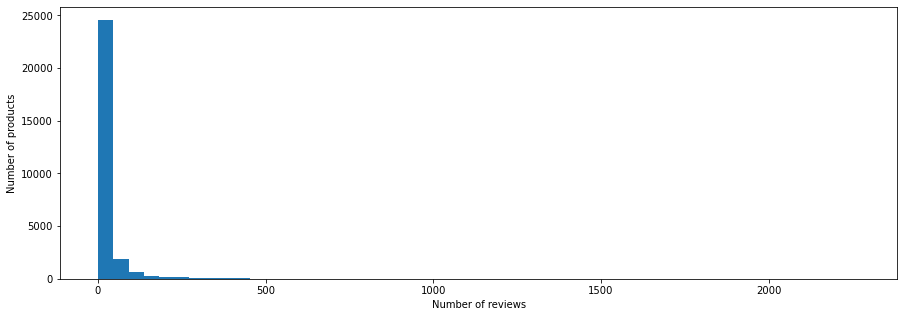

In [10]:
# Distribution of the number of reviews across products
# Group the reviews by product ID and count the number of reviews per product
reviews_per_product = df['asin'].value_counts()

plt.figure(figsize=(15,5))
# Visualize the distribution of the number of reviews across products using a histogram
plt.hist(reviews_per_product, bins=50)
plt.xlabel('Number of reviews')
plt.ylabel('Number of products')
plt.show()

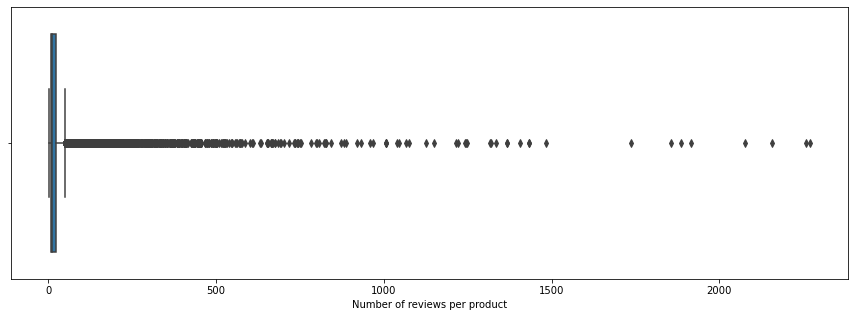

In [11]:
# Group the reviews by product ID and count the number of reviews per product
reviews_per_product_df = df.groupby('asin').size().reset_index(name='review_count')

plt.figure(figsize=(15,5))
# Visualize the distribution of the number of reviews per product using a box plot
sns.boxplot(x=reviews_per_product_df['review_count'])
plt.xlabel('Number of reviews per product')
plt.show()

<AxesSubplot:ylabel='Count'>

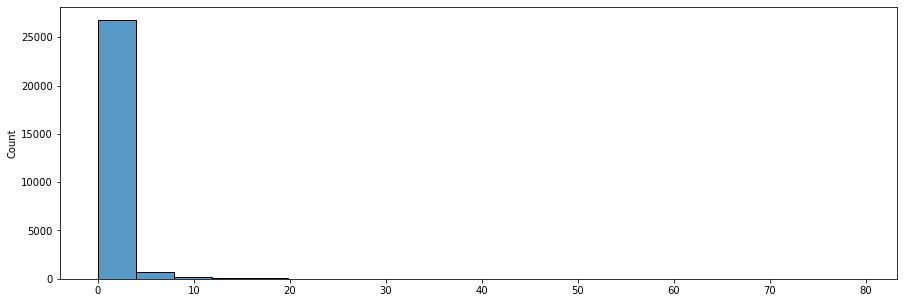

In [12]:
# Calculate the average number of reviews per product
reviews_per_product_df_ = df.groupby('asin').size()
avg_reviews_per_product = reviews_per_product_df_.mean()

plt.figure(figsize=(15,5))
# Plot the distribution of reviews per product
sns.histplot(reviews_per_product_df_/avg_reviews_per_product, bins=20)

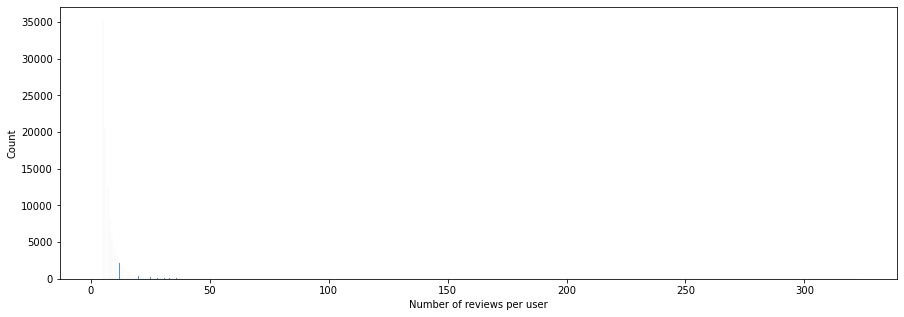

In [13]:
# Group the reviews by user ID and count the number of reviews per user
reviews_per_user = df.groupby('reviewerID').size().reset_index(name='review_count')

plt.figure(figsize=(15,5))
# Visualize the distribution of the number of reviews per user using a histogram
sns.histplot(x=reviews_per_user['review_count'])
plt.xlabel('Number of reviews per user')
plt.show()

<AxesSubplot:xlabel='review_count', ylabel='Density'>

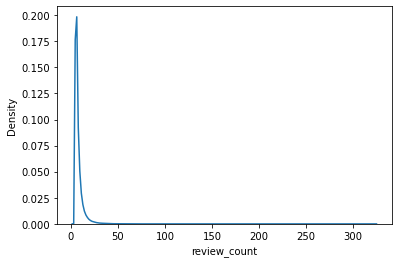

In [14]:
sns.kdeplot(reviews_per_user['review_count'])

In [15]:
print("Average review per product:", avg_reviews_per_product)

Average review per product: 28.619953513320223


In [16]:
counts_of_reviews_per_product = df.groupby('asin').size()
for product, count_of_reviews_per_product in counts_of_reviews_per_product.iteritems():
  print(f'{product} has {count_of_reviews_per_product} reviews')
# counts_of_reviews_per_product

0140503528 has 11 reviews
0310432065 has 15 reviews
0310520347 has 22 reviews
0310802636 has 19 reviews
0310806607 has 16 reviews
0310806615 has 8 reviews
0310818605 has 7 reviews
0310818621 has 9 reviews
0310821800 has 22 reviews
0310823706 has 15 reviews
0312385331 has 6 reviews
0439394058 has 9 reviews
0439499887 has 83 reviews
0439505399 has 5 reviews
0439506042 has 5 reviews
0439509769 has 7 reviews
0439654939 has 7 reviews
0439731593 has 9 reviews
0439731771 has 10 reviews
0439784395 has 8 reviews
0439893577 has 29 reviews
0486256006 has 16 reviews
0486413012 has 43 reviews
0528002279 has 30 reviews
0528002287 has 33 reviews
0528847112 has 36 reviews
0528847120 has 8 reviews
052895993X has 9 reviews
0528959948 has 30 reviews
0528960911 has 18 reviews
0545040116 has 9 reviews
0545114780 has 27 reviews
0545114799 has 6 reviews
0545114802 has 6 reviews
0545114829 has 24 reviews
0545114985 has 22 reviews
0545115000 has 19 reviews
0545118239 has 5 reviews
0545196418 has 5 reviews
0545

B00006HPXJ has 32 reviews
B00006HQEJ has 16 reviews
B00006HQQ5 has 17 reviews
B00006HQU9 has 44 reviews
B00006HRIQ has 12 reviews
B00006HTLJ has 24 reviews
B00006HUP7 has 48 reviews
B00006HVNI has 86 reviews
B00006HX4B has 102 reviews
B00006HXNC has 38 reviews
B00006HYLW has 12 reviews
B00006HZ5F has 20 reviews
B00006HZCH has 12 reviews
B00006I51C has 23 reviews
B00006I529 has 7 reviews
B00006I577 has 190 reviews
B00006I579 has 11 reviews
B00006I58N has 527 reviews
B00006I5C3 has 6 reviews
B00006I5RH has 111 reviews
B00006I62X has 93 reviews
B00006I9S3 has 146 reviews
B00006I9T7 has 22 reviews
B00006I9V8 has 10 reviews
B00006I9VE has 27 reviews
B00006I9VJ has 40 reviews
B00006I9VS has 12 reviews
B00006I9VZ has 29 reviews
B00006I9W7 has 32 reviews
B00006I9XO has 6 reviews
B00006I9XP has 5 reviews
B00006I9ZT has 31 reviews
B00006IA0E has 23 reviews
B00006IA0F has 14 reviews
B00006IA0Q has 5 reviews
B00006IA5D has 178 reviews
B00006IA8S has 13 reviews
B00006IA99 has 59 reviews
B00006IA9A 

B000GAVGHK has 5 reviews
B000GAVHQA has 396 reviews
B000GAVJI6 has 7 reviews
B000GAVJVI has 5 reviews
B000GAVKKS has 15 reviews
B000GAVKMQ has 5 reviews
B000GAVLN4 has 5 reviews
B000GAVNEG has 46 reviews
B000GAVP12 has 12 reviews
B000GAVP6W has 14 reviews
B000GAVUO4 has 6 reviews
B000GAVWDS has 43 reviews
B000GAVX2I has 5 reviews
B000GAVYDG has 6 reviews
B000GAVYZY has 18 reviews
B000GAXB3M has 25 reviews
B000GAXBXC has 12 reviews
B000GAXEYI has 24 reviews
B000GAXFYC has 30 reviews
B000GAXGH8 has 73 reviews
B000GAXGJG has 9 reviews
B000GAXIM6 has 24 reviews
B000GAXIRQ has 63 reviews
B000GAXKX8 has 35 reviews
B000GAXL7I has 119 reviews
B000GAXPH4 has 9 reviews
B000GAXRGS has 25 reviews
B000GAXXDK has 25 reviews
B000GAXXG2 has 9 reviews
B000GAXYHK has 20 reviews
B000GAYFK0 has 11 reviews
B000GAZ6UI has 14 reviews
B000GAZ73E has 10 reviews
B000GAZ78O has 7 reviews
B000GAZ87E has 23 reviews
B000GAZDZ6 has 7 reviews
B000GAZKQS has 5 reviews
B000GAZL0I has 19 reviews
B000GAZMDO has 52 review

B000IT756A has 26 reviews
B000IZEKJE has 17 reviews
B000J05ETS has 24 reviews
B000J05F06 has 14 reviews
B000J05GKA has 58 reviews
B000J05H7C has 14 reviews
B000J05HN6 has 9 reviews
B000J05IZI has 9 reviews
B000J05LPU has 36 reviews
B000J05NDA has 6 reviews
B000J07C0W has 11 reviews
B000J07DY2 has 6 reviews
B000J07EF0 has 7 reviews
B000J07EJQ has 11 reviews
B000J07EVY has 44 reviews
B000J07JXM has 5 reviews
B000J07JYQ has 13 reviews
B000J07KHM has 32 reviews
B000J07LU8 has 13 reviews
B000J07LZI has 41 reviews
B000J07MUM has 7 reviews
B000J07P0Y has 7 reviews
B000J07P18 has 18 reviews
B000J07P8Q has 30 reviews
B000J07P9U has 46 reviews
B000J07Q44 has 26 reviews
B000J07R8E has 5 reviews
B000J07RVQ has 15 reviews
B000J09BKG has 39 reviews
B000J09CO6 has 475 reviews
B000J09D2W has 1367 reviews
B000J09D8Q has 9 reviews
B000J09DNQ has 6 reviews
B000J09DO0 has 6 reviews
B000J09E26 has 10 reviews
B000J09E80 has 6 reviews
B000J09EDU has 10 reviews
B000J09F5W has 10 reviews
B000J09FXE has 6 revie

B001B09BX0 has 24 reviews
B001B09D7O has 11 reviews
B001B09FJA has 13 reviews
B001B09GLM has 6 reviews
B001B09HSY has 8 reviews
B001B0AIRS has 5 reviews
B001B0AISW has 8 reviews
B001B0ALZW has 16 reviews
B001B0ARA6 has 45 reviews
B001B0ASBO has 66 reviews
B001B0B1O2 has 6 reviews
B001B0B4G2 has 6 reviews
B001B0B5IY has 13 reviews
B001B0B6B0 has 19 reviews
B001B0BDPO has 8 reviews
B001B0BDW2 has 11 reviews
B001B0BE6M has 19 reviews
B001B0BF7K has 10 reviews
B001B0BFA2 has 127 reviews
B001B0CP74 has 19 reviews
B001B0CPMO has 14 reviews
B001B0CQN2 has 7 reviews
B001B0CTMU has 147 reviews
B001B0CV3C has 46 reviews
B001B0CXVM has 8 reviews
B001B0D3WK has 30 reviews
B001B0D55A has 22 reviews
B001B0D5T6 has 175 reviews
B001B0D79O has 8 reviews
B001B0D7YY has 17 reviews
B001B0D82A has 12 reviews
B001B0DBV8 has 25 reviews
B001B0DBZE has 8 reviews
B001B0DCD0 has 8 reviews
B001B0DDUM has 5 reviews
B001B0DG0Y has 35 reviews
B001B0E644 has 29 reviews
B001B0E6P8 has 30 reviews
B001B0EE4G has 14 revi

B001DBL2O8 has 6 reviews
B001DC2RC8 has 6 reviews
B001DC5NW4 has 6 reviews
B001DC5NWY has 11 reviews
B001DC5NX8 has 8 reviews
B001DC7LM4 has 16 reviews
B001DC7LNI has 10 reviews
B001DC7LO2 has 23 reviews
B001DC9I5M has 11 reviews
B001DC9I7U has 8 reviews
B001DCBMP6 has 7 reviews
B001DCBMQK has 28 reviews
B001DCBMR4 has 8 reviews
B001DCDSVW has 8 reviews
B001DCDSW6 has 18 reviews
B001DCGMR4 has 14 reviews
B001DDAXLY has 7 reviews
B001DDPO90 has 5 reviews
B001DEJME2 has 5 reviews
B001DEK6TM has 6 reviews
B001DEK6YC has 41 reviews
B001DELVW8 has 10 reviews
B001DEX1QW has 34 reviews
B001DEZ5L6 has 26 reviews
B001DH4U46 has 8 reviews
B001DHJLOU has 11 reviews
B001DI3HJ4 has 15 reviews
B001DI5HX8 has 9 reviews
B001DI8FSM has 22 reviews
B001DIIWA8 has 8 reviews
B001DIKQSY has 40 reviews
B001DIMERA has 40 reviews
B001DJ0GE2 has 7 reviews
B001DJ6BW8 has 10 reviews
B001DJ6C2W has 10 reviews
B001DJ6C3G has 25 reviews
B001DJ6DH6 has 11 reviews
B001DJ7ZLE has 11 reviews
B001DJ80RC has 44 reviews
B0

B004DMEP3Y has 52 reviews
B004DNK7PS has 66 reviews
B004DNX6G0 has 10 reviews
B004DNX6NI has 4 reviews
B004DNX6UQ has 14 reviews
B004DOOJWE has 53 reviews
B004DOOLQI has 9 reviews
B004DQYG8Y has 37 reviews
B004DR1YA6 has 8 reviews
B004DR1Z3M has 53 reviews
B004DR5A3I has 16 reviews
B004DR73XS has 33 reviews
B004DRAVPU has 6 reviews
B004DRB4FQ has 8 reviews
B004DRB4OC has 17 reviews
B004DRDAVW has 102 reviews
B004DRDEE0 has 5 reviews
B004DRDYQ8 has 37 reviews
B004DVEDRS has 7 reviews
B004DW0P1U has 119 reviews
B004DWI5M6 has 521 reviews
B004DYW31I has 16 reviews
B004E1L25S has 28 reviews
B004E1L29Y has 33 reviews
B004E2BR9S has 10 reviews
B004E2IOWQ has 9 reviews
B004E2KAZK has 21 reviews
B004E2KLMC has 12 reviews
B004E2MVMK has 7 reviews
B004E2O0DS has 17 reviews
B004E2O6MI has 101 reviews
B004E2OMLI has 6 reviews
B004E2OX3A has 7 reviews
B004E2P2FS has 12 reviews
B004E2PHHG has 7 reviews
B004E2Q2FM has 17 reviews
B004E2QBKS has 5 reviews
B004E2RF7G has 9 reviews
B004E2RKL2 has 6 revie

B004Q9XLW0 has 36 reviews
B004Q9ZBWS has 53 reviews
B004Q9ZC90 has 11 reviews
B004QAG9SM has 13 reviews
B004QJ8PZ8 has 46 reviews
B004QJX0L2 has 5 reviews
B004QJX1JI has 23 reviews
B004QM94KU has 8 reviews
B004QM99K0 has 117 reviews
B004QMQ12E has 18 reviews
B004QPVZ40 has 17 reviews
B004QQ5I0Q has 125 reviews
B004QQ5I10 has 15 reviews
B004QVH0RK has 18 reviews
B004QVMKOS has 9 reviews
B004QVSUII has 5 reviews
B004QWCQS2 has 23 reviews
B004QWDD5C has 7 reviews
B004QWZINW has 37 reviews
B004QXDFAO has 5 reviews
B004QXIFCC has 145 reviews
B004R1LXOK has 73 reviews
B004R5BXCS has 11 reviews
B004R6TTQO has 7 reviews
B004R6YN4M has 8 reviews
B004R7AP4S has 6 reviews
B004R7C0JG has 9 reviews
B004R7CXVQ has 7 reviews
B004RE21PM has 5 reviews
B004REQY5U has 5 reviews
B004RJ5Z0U has 5 reviews
B004RPKW5C has 15 reviews
B004RTME54 has 26 reviews
B004RTME86 has 23 reviews
B004RTNWUA has 62 reviews
B004RTPX6Q has 12 reviews
B004RTSYG2 has 13 reviews
B004RTT6KU has 5 reviews
B004RTT8DA has 26 review

B00ARQUOS0 has 8 reviews
B00ARTHE4O has 5 reviews
B00ASHH602 has 26 reviews
B00ASJHIIU has 5 reviews
B00ASNVGJS has 7 reviews
B00ASSO3SE has 9 reviews
B00ASSRP6G has 8 reviews
B00ASXE2RG has 5 reviews
B00AT6V4DC has 12 reviews
B00ATBRJRM has 20 reviews
B00ATM1N9Q has 29 reviews
B00ATS49PU has 28 reviews
B00ATTBBAK has 5 reviews
B00ATTEC4M has 21 reviews
B00ATTHDZ2 has 5 reviews
B00ATTK3T0 has 40 reviews
B00ATTKMWI has 5 reviews
B00ATVCGL6 has 36 reviews
B00ATVDDEK has 27 reviews
B00ATVJQ0K has 35 reviews
B00ATVNV8S has 74 reviews
B00ATZ9K02 has 150 reviews
B00ATZ9K0C has 170 reviews
B00ATZ9QMO has 27 reviews
B00ATZJ746 has 54 reviews
B00ATZJ99Y has 18 reviews
B00ATZJ9AI has 11 reviews
B00ATZJ9AS has 57 reviews
B00AU4MM3Y has 7 reviews
B00AU7BNTK has 5 reviews
B00AU8Y9SQ has 12 reviews
B00AU9UYAM has 5 reviews
B00AU9V0ZU has 7 reviews
B00AU9V3FC has 28 reviews
B00AUB2UM0 has 11 reviews
B00AUKYNDK has 8 reviews
B00AUKYNMQ has 9 reviews
B00AUKYNS0 has 5 reviews
B00AUMFKXK has 5 reviews
B0

B00BMLQSNO has 36 reviews
B00BMVST4K has 5 reviews
B00BMW0V9K has 6 reviews
B00BMYNC8K has 99 reviews
B00BN03MVK has 5 reviews
B00BN03OLS has 11 reviews
B00BN1LDC4 has 9 reviews
B00BN3SC9E has 8 reviews
B00BN46WIQ has 63 reviews
B00BN5FE1Q has 13 reviews
B00BN5FFFG has 25 reviews
B00BNDQO5S has 5 reviews
B00BNIM7OA has 5 reviews
B00BNPL5A0 has 6 reviews
B00BNPPJ8O has 21 reviews
B00BNWR6UG has 8 reviews
B00BNXT900 has 6 reviews
B00BNYA13S has 70 reviews
B00BNYA1FG has 5 reviews
B00BNYC9QU has 7 reviews
B00BO8CJRO has 5 reviews
B00BOB654E has 5 reviews
B00BOB66HA has 16 reviews
B00BOBZO9G has 23 reviews
B00BOGU11C has 9 reviews
B00BOMBSSQ has 7 reviews
B00BONIVBW has 9 reviews
B00BORWWPO has 27 reviews
B00BOSXBR6 has 5 reviews
B00BOVCM9Q has 13 reviews
B00BP3OVJM has 15 reviews
B00BP4FSO8 has 17 reviews
B00BP7SW0C has 347 reviews
B00BPDMOL4 has 68 reviews
B00BPDNTRM has 33 reviews
B00BPF06AI has 25 reviews
B00BPJLLSA has 10 reviews
B00BPLFBH0 has 13 reviews
B00BPN0AII has 8 reviews
B00B

B00K6P38RG has 10 reviews
B00K6P3AU6 has 7 reviews
B00K6P3C22 has 15 reviews
B00K6P3EWU has 8 reviews
B00K6PODI4 has 17 reviews
B00K6PU4O6 has 12 reviews
B00K6VEDYW has 6 reviews
B00K6XLZEG has 5 reviews
B00K6YC0IK has 27 reviews
B00K71PJ8K has 12 reviews
B00K73C4RM has 5 reviews
B00K74H2LY has 12 reviews
B00K768DHY has 19 reviews
B00K7AZ030 has 6 reviews
B00K7CIM38 has 18 reviews
B00K7CY5AM has 6 reviews
B00K7GER10 has 15 reviews
B00K7I35JS has 22 reviews
B00K7II6P6 has 23 reviews
B00K7IJ05G has 13 reviews
B00K7J3C7C has 9 reviews
B00K7J9SNE has 5 reviews
B00K7S1CUW has 6 reviews
B00K81O0G6 has 39 reviews
B00K83OV7C has 5 reviews
B00K85ACWI has 5 reviews
B00K85SDT2 has 5 reviews
B00K896188 has 24 reviews
B00K899QA8 has 23 reviews
B00K89GSRW has 116 reviews
B00K8CE0ZQ has 8 reviews
B00K8CE416 has 12 reviews
B00K8CE7HC has 5 reviews
B00K8CE92K has 10 reviews
B00K8DHYRG has 5 reviews
B00K8DYX20 has 6 reviews
B00K8FEJEK has 5 reviews
B00K8FIMQ6 has 6 reviews
B00K8FSZOK has 132 reviews
B00

B00WDT82S8 has 12 reviews
B00WDXBWSQ has 30 reviews
B00WDYSPQW has 21 reviews
B00WE6658O has 87 reviews
B00WE66G3I has 6 reviews
B00WE73XTC has 6 reviews
B00WEQRT7K has 9 reviews
B00WEWAGSS has 13 reviews
B00WEWAYAI has 11 reviews
B00WEWCCT4 has 41 reviews
B00WEWCKR8 has 52 reviews
B00WEWCP96 has 6 reviews
B00WF68MYI has 10 reviews
B00WF8YAQ0 has 7 reviews
B00WF91V5W has 18 reviews
B00WFJ1M10 has 7 reviews
B00WFQG2T0 has 27 reviews
B00WFXOVSW has 5 reviews
B00WG4A52Q has 8 reviews
B00WGAXK9K has 71 reviews
B00WGBSD5U has 24 reviews
B00WGC8F16 has 8 reviews
B00WGGXBUC has 39 reviews
B00WGWG4UK has 10 reviews
B00WH2TBTK has 9 reviews
B00WH3CLFK has 16 reviews
B00WH48388 has 9 reviews
B00WH4SPCM has 8 reviews
B00WH4VOYS has 42 reviews
B00WHK18JI has 5 reviews
B00WHN6D2C has 49 reviews
B00WHP9YHQ has 10 reviews
B00WHXQIJA has 71 reviews
B00WIF5208 has 9 reviews
B00WIF55JQ has 5 reviews
B00WIF6JFU has 11 reviews
B00WIG9RNU has 6 reviews
B00WIKV5U4 has 5 reviews
B00WIRXNL6 has 31 reviews
B00

B00YAXTMG6 has 6 reviews
B00YAXTQG2 has 6 reviews
B00YAXTQM6 has 8 reviews
B00YAXTRN4 has 5 reviews
B00YAXTRTS has 17 reviews
B00YB15SS8 has 8 reviews
B00YB2E7RA has 20 reviews
B00YB3LQZA has 5 reviews
B00YBZE1M8 has 43 reviews
B00YC0IDLW has 15 reviews
B00YC2ENV4 has 8 reviews
B00YCAU676 has 21 reviews
B00YD4B5IU has 27 reviews
B00YD56HDM has 13 reviews
B00YD5IWG2 has 41 reviews
B00YD7MY5U has 14 reviews
B00YDG1H68 has 10 reviews
B00YDG3HFC has 20 reviews
B00YDG4ND2 has 14 reviews
B00YDGV97K has 17 reviews
B00YDHVZH8 has 26 reviews
B00YDIQ7WA has 8 reviews
B00YDM8IOG has 13 reviews
B00YDMV7PI has 6 reviews
B00YDMXT9A has 6 reviews
B00YDRPQ1O has 14 reviews
B00YDRRD9W has 22 reviews
B00YEBFV7S has 5 reviews
B00YEEY7LG has 6 reviews
B00YENLBKC has 14 reviews
B00YESSPFG has 7 reviews
B00YEUC52S has 7 reviews
B00YEUCI7A has 12 reviews
B00YEUDBL2 has 6 reviews
B00YEVGG6I has 5 reviews
B00YFCSLW8 has 6 reviews
B00YFEZ46C has 10 reviews
B00YFNX6NQ has 5 reviews
B00YFNYVTE has 7 reviews
B00YF

B01DSKHDL2 has 8 reviews
B01DSL2898 has 8 reviews
B01DSOIQO6 has 12 reviews
B01DT1T296 has 45 reviews
B01DTC69TQ has 5 reviews
B01DTF35VS has 12 reviews
B01DTG6V18 has 5 reviews
B01DTG8H0Q has 6 reviews
B01DTHN61U has 20 reviews
B01DTII1EQ has 14 reviews
B01DTNGNGE has 15 reviews
B01DTUZ3HW has 5 reviews
B01DU5244Q has 7 reviews
B01DU8784O has 19 reviews
B01DUB4GVO has 6 reviews
B01DUKIQDE has 20 reviews
B01DUUY9MQ has 7 reviews
B01DUWVERM has 5 reviews
B01DUX56WA has 10 reviews
B01DUX5CCE has 6 reviews
B01DUXP9I6 has 6 reviews
B01DVO1ID4 has 21 reviews
B01DVO227A has 23 reviews
B01DVO2GSK has 19 reviews
B01DVPIDOA has 8 reviews
B01DVQL5BM has 7 reviews
B01DVTSSD2 has 16 reviews
B01DVUASM0 has 6 reviews
B01DW8CBZ8 has 13 reviews
B01DWLUWCE has 18 reviews
B01DWM9KOE has 5 reviews
B01DWMLDXA has 8 reviews
B01DWNR60I has 26 reviews
B01DWQXFB4 has 5 reviews
B01DWT7HKG has 39 reviews
B01DX1VDG2 has 67 reviews
B01DX94Q2W has 7 reviews
B01DXA37NK has 5 reviews
B01DXBCXOI has 13 reviews
B01DXJ

B01FJAAEY2 has 13 reviews
B01FJGKDUG has 5 reviews
B01FJJ2JJG has 5 reviews
B01FJN72X0 has 11 reviews
B01FJUFWDA has 5 reviews
B01FJX85DG has 6 reviews
B01FJX8694 has 5 reviews
B01FKL6G7E has 21 reviews
B01FKPGAY4 has 9 reviews
B01FKPQ76U has 82 reviews
B01FKXOJOY has 18 reviews
B01FKZSCRW has 12 reviews
B01FL5DWDU has 9 reviews
B01FL5ZT9K has 6 reviews
B01FLGMJO2 has 8 reviews
B01FLHFO4S has 16 reviews
B01FLS0J3I has 6 reviews
B01FLSW9B8 has 5 reviews
B01FM23NTU has 16 reviews
B01FM23NU4 has 16 reviews
B01FM38PJC has 14 reviews
B01FM53Y14 has 6 reviews
B01FMBAY1G has 116 reviews
B01FMSPIG0 has 5 reviews
B01FMTFDA0 has 7 reviews
B01FMU6EI4 has 5 reviews
B01FN3RD8A has 5 reviews
B01FN61KPO has 6 reviews
B01FN6M44A has 7 reviews
B01FNPLLYK has 5 reviews
B01FNZDVPW has 8 reviews
B01FO62I68 has 5 reviews
B01FOZELFA has 7 reviews
B01FP0G5K8 has 6 reviews
B01FP61MMI has 17 reviews
B01FPDQNC0 has 7 reviews
B01FPFD3YO has 6 reviews
B01FPOU6BI has 15 reviews
B01FPV987Y has 6 reviews
B01FQ1895K 

In [17]:
len(counts_of_reviews_per_product)

27965

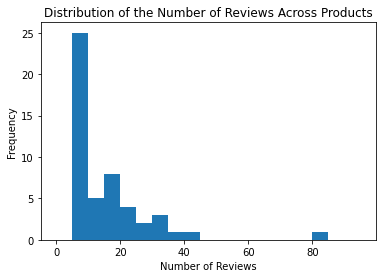

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the distribution using matplotlib.pyplot.hist() function.
plt.hist(counts_of_reviews_per_product[:50], bins=np.arange(0, 100, 5))
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.title('Distribution of the Number of Reviews Across Products')
plt.show()

In [19]:
counts_of_reviews_per_product[:10]

asin
0140503528    11
0310432065    15
0310520347    22
0310802636    19
0310806607    16
0310806615     8
0310818605     7
0310818621     9
0310821800    22
0310823706    15
dtype: int64

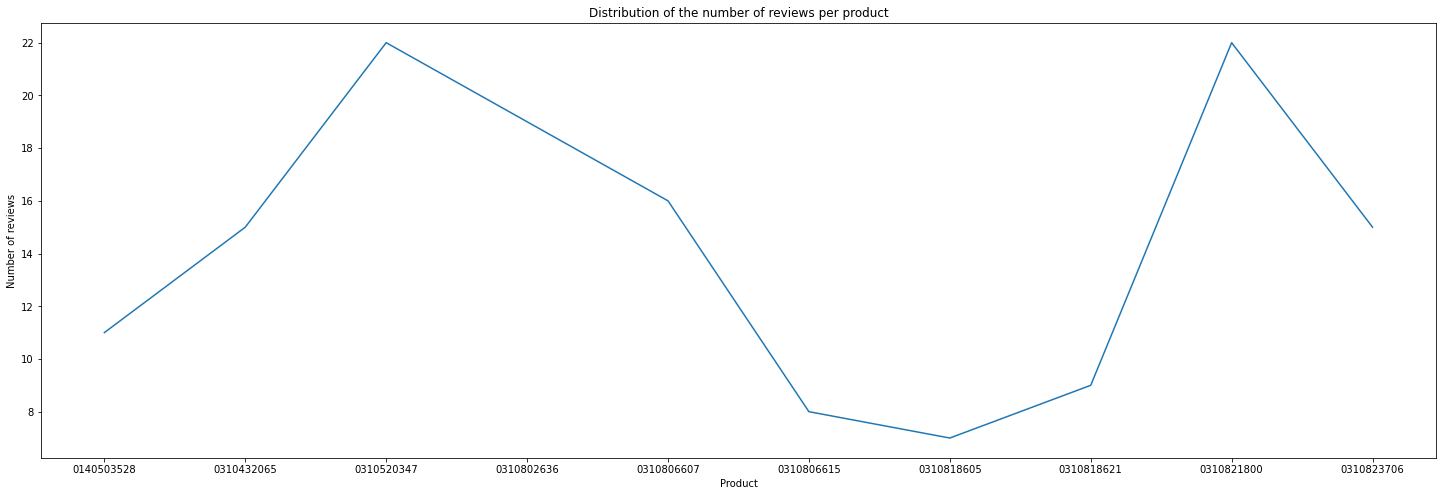

In [20]:
plt.figure(figsize=(25,8))
plt.plot(counts_of_reviews_per_product[:10])
plt.xlabel('Product')
plt.ylabel('Number of reviews')
plt.title('Distribution of the number of reviews per product')
plt.show()

In [21]:
counts_of_reviews_across_products = df.groupby(['asin', 'overall']).size()
# for product, count_of_reviews_per_product in counts_of_reviews_per_product.iteritems():
#   print(f'{product} has {count_of_reviews_per_product} reviews')
counts_of_reviews_across_products[:10]

asin        overall
0140503528  4.0         2
            5.0         9
0310432065  3.0         2
            4.0         2
            5.0        11
0310520347  3.0         1
            4.0         3
            5.0        18
0310802636  3.0         1
            4.0         3
dtype: int64

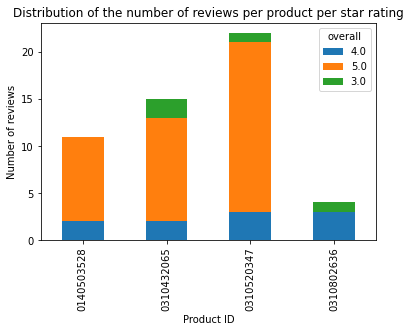

In [45]:
# Unstack the data to create a pivot table with product ids as rows and review ratings as columns
reviews_by_product_and_rating = counts_of_reviews_across_products[:10].unstack()

# Plot the distribution of the number of reviews per product per star rating as a histogram
reviews_by_product_and_rating.plot(kind='bar', stacked=True)
plt.xlabel('Product ID')
plt.ylabel('Number of reviews')
plt.title('Distribution of the number of reviews per product per star rating')
plt.show()

In [23]:
counts_of_reviews_per_user = df.groupby('reviewerID').size()
for user, count_of_review in counts_of_reviews_per_user.iteritems():
  print(f'{user} has {count_of_review} reviews')

A0001528BGUBOEVR6T5U has 5 reviews
A01003458IEUPS8LQ1QU has 6 reviews
A0203183BAH3TR08FZGB has 7 reviews
A0220159ZRNBTRKLG08H has 5 reviews
A0228801ER3IBSLNOT5W has 10 reviews
A0243759LWJA50LV06FT has 6 reviews
A03492194F0T997EZQ04 has 5 reviews
A0422204VM5KZUEMVY96 has 5 reviews
A0488385844WNV2OWO9X has 7 reviews
A05012776MTIS8L40R3I has 11 reviews
A0526222H977CBZM4DK7 has 6 reviews
A0718466DJ0Y591VLAL7 has 5 reviews
A0718784TOWF9DX1DOFD has 5 reviews
A0759107CA9MPWVRF6VN has 17 reviews
A0981908GQ3RO7WWK6FU has 6 reviews
A1002RB0A8LGMI has 7 reviews
A10032O4VA5EZ6 has 7 reviews
A1004703RC79J9 has 5 reviews
A1004HHMSDY5IP has 12 reviews
A1007NRYNXDJKL has 14 reviews
A1008TVH0VKIA2 has 6 reviews
A1009UWCCRSHY7 has 10 reviews
A100DO844MBA4W has 7 reviews
A100KNMAANCOPE has 5 reviews
A100P59TGEZHR has 6 reviews
A100PBAYYGVJ3X has 6 reviews
A100RH4M1W1DF0 has 6 reviews
A100S1JQ5XK960 has 10 reviews
A100UD67AHFODS has 25 reviews
A100UXMXYOQU1X has 13 reviews
A100V5QEICGPDA has 6 reviews
A10

A14L2638XC00EZ has 6 reviews
A14L2VM4GH6PN3 has 5 reviews
A14L2ZKF864EBK has 6 reviews
A14L33C8Q0E2FM has 9 reviews
A14L4IC9V71ML9 has 7 reviews
A14L5H4MYKKGH has 5 reviews
A14L6U5Z9QF3LW has 13 reviews
A14LE7YYKEACET has 7 reviews
A14LENCORW53HP has 5 reviews
A14LG64GIVZIGS has 18 reviews
A14LIGPEZDBV1 has 11 reviews
A14LM5SKQL9PIA has 8 reviews
A14LNAM90F2A54 has 5 reviews
A14LSFT3PFBIOZ has 9 reviews
A14LW6MB73K2JN has 6 reviews
A14M6OO3IMZF8G has 8 reviews
A14MCJ3J4QON7S has 6 reviews
A14MEL1BJOEPDL has 6 reviews
A14MFPOD1WZY6X has 5 reviews
A14MJXQ8PPM9E3 has 5 reviews
A14MLOHWHJFIK3 has 6 reviews
A14MLWH24VOIA has 9 reviews
A14MSHFCXPARFS has 17 reviews
A14MTQ6YLA2MG1 has 8 reviews
A14MWFXZY4MOPB has 9 reviews
A14MXCYTLMK2OY has 5 reviews
A14MYTPBY0ARLO has 6 reviews
A14MZJTZAQS6CV has 5 reviews
A14N13TSEZ38A7 has 5 reviews
A14N3LXP0G5YVP has 5 reviews
A14N6XFWMAA5OL has 12 reviews
A14N78WO4E9M7N has 7 reviews
A14N7CFIJ0WB6F has 14 reviews
A14N8PEDDHAWEN has 5 reviews
A14NBQZIAV7

A199Q2UGJKF6WI has 13 reviews
A199RGT3WZWO76 has 6 reviews
A199V9Y5ER1L5P has 6 reviews
A199WUPZGFH4WW has 5 reviews
A199XTSBUI1DF8 has 5 reviews
A199ZT526E005R has 10 reviews
A19A0OYKYFPEIN has 5 reviews
A19A1G5WSZROWM has 5 reviews
A19A3IGOD25AVB has 5 reviews
A19A7BIGHKV3JN has 6 reviews
A19A83SNJZYJCB has 13 reviews
A19A9P7O0UTG67 has 5 reviews
A19ACA1DG0PLKX has 5 reviews
A19ADYXE5QDBG6 has 6 reviews
A19AENT9WE6U5N has 8 reviews
A19AI1KJ3LAOQQ has 7 reviews
A19AI3UHNC5E4Z has 5 reviews
A19AL8BAS9CMZ has 27 reviews
A19AN8SBEY5MZW has 18 reviews
A19ANAPGTKGEW3 has 17 reviews
A19AQ0QGW1FBWM has 9 reviews
A19ARYBUVUL61Z has 5 reviews
A19ASMM3X6186N has 6 reviews
A19AT0TPOZDQ9B has 6 reviews
A19AUHLOJTCOK4 has 6 reviews
A19AW092XCDC5A has 6 reviews
A19B0HRLGNOIA1 has 5 reviews
A19B3LR2VGAP88 has 5 reviews
A19B4NMLC3X0V5 has 8 reviews
A19B52R13WC1AE has 8 reviews
A19B66XML2UM8P has 6 reviews
A19B6DZSDVJ6WC has 6 reviews
A19B9COPIZO9E has 7 reviews
A19BACMPQ7J1ZA has 5 reviews
A19BAYTZQ9

A1EHAOK0XD3P8E has 7 reviews
A1EHDOHJXL29YA has 12 reviews
A1EHDUH5PKUSB3 has 5 reviews
A1EHDVLCSOU57Q has 16 reviews
A1EHG8EBES6CV8 has 7 reviews
A1EHH7ZQUAXUSK has 8 reviews
A1EHITIFB0SATL has 6 reviews
A1EHIXEQ4RKKQN has 10 reviews
A1EHK7YX8W9BM7 has 6 reviews
A1EHO0CQUOZSQX has 6 reviews
A1EHPUEKB9TBOM has 6 reviews
A1EHU7NPEQNNC2 has 5 reviews
A1EHV0Y6ZV645S has 7 reviews
A1EHZ2C1UVNYNG has 37 reviews
A1EI2H6U5XHUCF has 6 reviews
A1EI5L4QL73XZC has 8 reviews
A1EI7E64850O34 has 5 reviews
A1EI8AZHZIGBXI has 7 reviews
A1EI8FJGM0H6AZ has 6 reviews
A1EIDRBZELUXNF has 15 reviews
A1EIFZLXET92Q2 has 7 reviews
A1EIMU64W9E43U has 5 reviews
A1EIN04APSDEEW has 7 reviews
A1EIQ2WF9F5Q0H has 6 reviews
A1EIQZMZ46C5AP has 13 reviews
A1EIR1HA2H57HH has 5 reviews
A1EIT4245LQX22 has 7 reviews
A1EIVBX3GCUS12 has 7 reviews
A1EIXEG2I2SQH2 has 5 reviews
A1EIY9GY4B10IU has 7 reviews
A1EJ03SN42YAA7 has 7 reviews
A1EJ0JEPKAQ7GB has 6 reviews
A1EJ0JEZW628KH has 9 reviews
A1EJ1NPA8NLDP9 has 5 reviews
A1EJ2GOW

A1JFWHRULXNNWC has 10 reviews
A1JFWKBGOQJNUA has 5 reviews
A1JFXOFDRZ9CFQ has 6 reviews
A1JFXUCXT356UK has 5 reviews
A1JFZDX0FHUX54 has 6 reviews
A1JG0IG5POG4N1 has 6 reviews
A1JG2WZIJXQZCS has 5 reviews
A1JG9KLAG64S95 has 9 reviews
A1JG9R39UQI4L4 has 6 reviews
A1JG9SJS7PWG3E has 6 reviews
A1JGEMXXESG019 has 5 reviews
A1JGLYPR639P45 has 6 reviews
A1JGPCWI9LDLFV has 6 reviews
A1JGRU7NGEGDCA has 6 reviews
A1JGSSLZA1MTIR has 6 reviews
A1JGUT70FE04L8 has 10 reviews
A1JGVETDI2G0NF has 11 reviews
A1JGZ401B4GAQ2 has 11 reviews
A1JH13LXNI26QQ has 6 reviews
A1JH23815DVN5K has 14 reviews
A1JH3NB06WN8MI has 8 reviews
A1JH4RE328VB3K has 6 reviews
A1JH5EKCDJPXSH has 38 reviews
A1JHJ0UJ72ELQD has 7 reviews
A1JHJLYI6EPLRT has 6 reviews
A1JHOROY1N2WI7 has 6 reviews
A1JHOUZ5TN1EX has 31 reviews
A1JHR668G6VEC6 has 8 reviews
A1JHT78OA3N8HU has 5 reviews
A1JHT98H3NJUMX has 7 reviews
A1JHUDF3JREERL has 6 reviews
A1JHUFR0GJBAKW has 5 reviews
A1JHWGQP2C7G75 has 5 reviews
A1JHXIJJ773BZR has 5 reviews
A1JHXTLJ

A1ORAU9B8TJRQ5 has 8 reviews
A1ORFWUFQ6XWVY has 5 reviews
A1ORKWI1C0BBZW has 6 reviews
A1ORLFSKARDKMS has 5 reviews
A1ORMQ493KHEKA has 7 reviews
A1ORN129R2LBTH has 14 reviews
A1ORODEBRN64C has 8 reviews
A1ORPAMTXYZ8GU has 5 reviews
A1ORS2DG7ZOFHJ has 6 reviews
A1ORS2ZES5B8Y7 has 5 reviews
A1ORSSRTFMQCY5 has 7 reviews
A1ORTI9SBFCHKI has 5 reviews
A1ORUSHRRG0VWN has 5 reviews
A1ORW6B32NZ3Y5 has 12 reviews
A1ORWGP9UE18FY has 5 reviews
A1ORXR3477DHMB has 7 reviews
A1ORYRKIY1MB0R has 5 reviews
A1ORZVFCJPD44Y has 5 reviews
A1OS0SKJB94439 has 5 reviews
A1OS11W07BLB57 has 5 reviews
A1OS1J0D2PXA1J has 15 reviews
A1OS3SCESE2N1O has 6 reviews
A1OS8ICUFW5F9H has 13 reviews
A1OS9A3EQA9YUJ has 7 reviews
A1OSA8EPFVXPQF has 6 reviews
A1OSCG3HTGFK05 has 7 reviews
A1OSD1UPSXW7K2 has 5 reviews
A1OSFXOUGBKQQ5 has 5 reviews
A1OSGG54J551DF has 5 reviews
A1OSHIH3Z5D4XX has 6 reviews
A1OSLOU0RWH3HX has 5 reviews
A1OSML542WFSBK has 7 reviews
A1OSMUWASSRR36 has 9 reviews
A1OSO06K1KECZK has 6 reviews
A1OSSMOCZQ3

A1U81KI0VK9RGL has 5 reviews
A1U82VHJ1XON5H has 8 reviews
A1U831YICZBXX9 has 5 reviews
A1U8561KXKEQ8B has 6 reviews
A1U85C02RM6I3M has 32 reviews
A1U86MUDHK0ICI has 5 reviews
A1U86OKZH2U2SS has 5 reviews
A1U8EMDWB4K6AT has 12 reviews
A1U8FUNSO1CIQ8 has 5 reviews
A1U8GLBY3ZB5P4 has 13 reviews
A1U8MLPLRZP6D0 has 7 reviews
A1U8MM3OQ7IPGQ has 7 reviews
A1U8NGJMHH429G has 8 reviews
A1U8NRSVTWZG1C has 6 reviews
A1U8UHV3H9AH0P has 10 reviews
A1U8UL1ER8U4KS has 5 reviews
A1U8VI6I2MFEU8 has 12 reviews
A1U8WIEBJ1N0Q5 has 5 reviews
A1U8Y09VMIF2H4 has 5 reviews
A1U90HS68VU03H has 5 reviews
A1U90MYVSLLFI1 has 6 reviews
A1U90SGYXZPNY3 has 5 reviews
A1U995VE2D3BD has 10 reviews
A1U9B6II70C48F has 6 reviews
A1U9EYMTIAVCKY has 5 reviews
A1U9FALAQYPV8I has 15 reviews
A1U9FF0V7FAVTZ has 7 reviews
A1U9H45YQBX61G has 30 reviews
A1U9M9K10JFJNY has 10 reviews
A1U9SGAT1ZMFIL has 6 reviews
A1U9UEPCYI71GK has 5 reviews
A1U9V2SNBXT38F has 8 reviews
A1U9YR7IATD490 has 9 reviews
A1U9ZRVM7ZN9IL has 5 reviews
A1UA21

A1YZHY0VE8UQ97 has 11 reviews
A1YZM010MMNVHU has 8 reviews
A1YZMF0XIT39GE has 6 reviews
A1YZMLA08ES749 has 5 reviews
A1YZN96E3P23YZ has 6 reviews
A1YZP0JU46SM61 has 5 reviews
A1YZPGRACJ8PNZ has 6 reviews
A1YZPHA3HW9ANW has 10 reviews
A1YZRKEVOW8XCR has 6 reviews
A1YZS6J8K6FA3M has 5 reviews
A1YZWLVFD6377O has 5 reviews
A1YZWY5SJH43O8 has 8 reviews
A1Z013D38SXE7K has 9 reviews
A1Z02EHWC3QF3W has 9 reviews
A1Z03F8JSW3HYH has 8 reviews
A1Z062OQK748QJ has 18 reviews
A1Z066GWK24T4U has 8 reviews
A1Z06AYLXM7HVJ has 10 reviews
A1Z08YT85JSE9I has 5 reviews
A1Z0BXWYKBSF3Q has 7 reviews
A1Z0DEBBD6IVC4 has 5 reviews
A1Z0DK136W4AA9 has 5 reviews
A1Z0DOUZ8VU58Y has 5 reviews
A1Z0E95ILK1JSO has 6 reviews
A1Z0FQGEPV017X has 5 reviews
A1Z0K3LNNGE24M has 14 reviews
A1Z0LTKUA6F94D has 18 reviews
A1Z0MOBQDO9LCB has 15 reviews
A1Z0MU2QFSW024 has 5 reviews
A1Z0NIO16UXTH has 26 reviews
A1Z0OXDE1OORVF has 6 reviews
A1Z0UVKUQZOKFH has 6 reviews
A1Z0UVYA0X66ZK has 6 reviews
A1Z0WWS29Q719H has 6 reviews
A1Z0XIM

A23SA8MHPRR9Q4 has 5 reviews
A23SBPHY7V6LJS has 5 reviews
A23SCTDOW66NEJ has 5 reviews
A23SD8E2X22GA1 has 6 reviews
A23SDOYBLCE326 has 7 reviews
A23SGWPQOSN63I has 5 reviews
A23SLMANOBIIVG has 6 reviews
A23SMJNIGCPSDK has 5 reviews
A23SP3N3TJQNVW has 7 reviews
A23STUXN3CAWQO has 6 reviews
A23SV224EUX0IY has 11 reviews
A23SX42G6RZYGM has 8 reviews
A23SZZDLM7B2HJ has 5 reviews
A23T22W638YWOP has 5 reviews
A23T32OTPTZU2V has 6 reviews
A23TCQCLIWXY3D has 5 reviews
A23TDYQWR362FM has 5 reviews
A23TFBX0LSSVSX has 5 reviews
A23TGEQ4CG90PA has 7 reviews
A23TGI02RB7JC has 17 reviews
A23THDWSWX7WAT has 5 reviews
A23TLRF4VEPUFO has 7 reviews
A23TMAB2RLH489 has 8 reviews
A23TNJE4TJQGX8 has 5 reviews
A23TPK7424KN1T has 7 reviews
A23TSDRV2ORHS8 has 5 reviews
A23TTXEQQGSM4F has 20 reviews
A23TU73Z6LVKDL has 9 reviews
A23TV6NIMIJ5W7 has 7 reviews
A23TXEWFVSXCLZ has 10 reviews
A23TYK5H9TH1C1 has 16 reviews
A23U2RC1J3W42O has 6 reviews
A23U3T1D4FAZ4T has 5 reviews
A23U567BP27HLV has 7 reviews
A23U6L9WV4

A2931NJVVQUQE5 has 8 reviews
A2933DSLQ61ZMA has 9 reviews
A2935JDQGQS5J6 has 5 reviews
A2938GNQGHT0BL has 5 reviews
A2939B0N00BL7H has 15 reviews
A293AB7P7DFJM1 has 6 reviews
A293AD7KOM8W07 has 6 reviews
A293BENXKWKH6Y has 7 reviews
A293CO1UI5DKD6 has 6 reviews
A293FQGRQUJM41 has 5 reviews
A293G0JQ8B1VP5 has 5 reviews
A293HA28PN3VO4 has 17 reviews
A293L4NT2U7XZC has 5 reviews
A293O0Z5FXKCK6 has 7 reviews
A293OW1IRJARFO has 8 reviews
A293SEFKCBFE50 has 6 reviews
A293TIGAWG9ZHX has 9 reviews
A293TWAGWIR0BT has 9 reviews
A293UNDCULLFQM has 14 reviews
A29409ZLFH0EJB has 20 reviews
A2942YOA48DSGG has 5 reviews
A2944OI285D7M3 has 16 reviews
A2945SEZPEN3XB has 8 reviews
A294646GXSWKOX has 9 reviews
A2947UBKVF4UPR has 7 reviews
A294868J1UQS5W has 7 reviews
A2948QWE72VNMQ has 6 reviews
A294A0VMK63QSX has 9 reviews
A294CBZEPPK21E has 5 reviews
A294CCMZDX3AKP has 10 reviews
A294D32O09MC8N has 6 reviews
A294EI4FEQ2390 has 5 reviews
A294FUP8RKFUJY has 9 reviews
A294H0R6I14CU4 has 11 reviews
A294H8S

A2EN3VH0ZKOR5H has 5 reviews
A2EN46UINUFCNA has 6 reviews
A2EN6QCOHNB6F1 has 5 reviews
A2EN82VBJT44QP has 11 reviews
A2ENAHE0WA44OR has 7 reviews
A2ENC59IPSXYLV has 7 reviews
A2ENH8F6WRJHY has 6 reviews
A2ENHLZJAWC5M has 6 reviews
A2ENL8SWTHBOP2 has 16 reviews
A2ENNRTPMJML1O has 6 reviews
A2ENNTNHK2R852 has 9 reviews
A2ENQFNRFT16Y3 has 5 reviews
A2ENQHL4ACD72Q has 5 reviews
A2ENROCN5VISHW has 9 reviews
A2ENS7SALHI24N has 5 reviews
A2ENX0JZHY58DS has 10 reviews
A2EO2Y1OCAWR21 has 7 reviews
A2EO34QBQRJXMW has 7 reviews
A2EO89CAB014WK has 6 reviews
A2EOA6JRRRZILB has 5 reviews
A2EOC5625O6169 has 8 reviews
A2EOCQG0ADPYL0 has 16 reviews
A2EOCTVRL7FBMF has 6 reviews
A2EOD971FL8LMX has 5 reviews
A2EOF9HIZIU2DS has 5 reviews
A2EOGI8UAQG5TY has 5 reviews
A2EOGNVR0WUNMD has 5 reviews
A2EOHDNBGFK9JO has 5 reviews
A2EOHVVRKHCELX has 5 reviews
A2EOKM5ECQUMLT has 5 reviews
A2EOLMSMEKS0QZ has 5 reviews
A2EOLNHPT9FBS7 has 14 reviews
A2EOLXPGVSYTY8 has 6 reviews
A2EONLXLVTBKB3 has 5 reviews
A2EOR5ALWEP

A2JXP4O17F2OPJ has 14 reviews
A2JXS1JII6SAUD has 5 reviews
A2JXSE0TZ4FB4X has 7 reviews
A2JXTZCMXLIIOP has 6 reviews
A2JXVG0KUZJARD has 5 reviews
A2JXVM40EIV9F6 has 5 reviews
A2JXWKX9YY4M8F has 10 reviews
A2JXX8VLFJS04X has 6 reviews
A2JXZJ3LPH2MOK has 6 reviews
A2JY1KEK06YHTD has 11 reviews
A2JY2MRQVC7UH5 has 33 reviews
A2JY4YLUCJ4NI0 has 20 reviews
A2JY6ORWCTMC1A has 7 reviews
A2JY6QZ7L00KND has 16 reviews
A2JYAS4AALOJR8 has 5 reviews
A2JYAX6ELLQOQO has 6 reviews
A2JYBLUBCBO61H has 5 reviews
A2JYDSFIMD0ZKK has 10 reviews
A2JYHQIEGAOQKF has 6 reviews
A2JYI6SKN8HAOP has 6 reviews
A2JYIXRQOE210D has 10 reviews
A2JYJTMOHVX95Q has 8 reviews
A2JYMSXGNC9T1 has 5 reviews
A2JYPH2S66U8U8 has 12 reviews
A2JYR5KRZ02HJS has 5 reviews
A2JYS972R2446D has 9 reviews
A2JYVVQ8A4QAIV has 7 reviews
A2JYXFC45LGRM5 has 5 reviews
A2JZ17FAEOXMR9 has 5 reviews
A2JZ317219DMP7 has 5 reviews
A2JZ3Q48X44CFO has 5 reviews
A2JZ67UA01WQJB has 6 reviews
A2JZ6IVN8ZJ7CF has 6 reviews
A2JZ8T64YZDQSI has 5 reviews
A2JZA6

A2P7ETF71MU8QB has 6 reviews
A2P7EVNBH5UTA9 has 7 reviews
A2P7H58ESH4Z69 has 9 reviews
A2P7HBW3TKS416 has 9 reviews
A2P7LD7KUMMJRR has 9 reviews
A2P7LZQU61S5D2 has 7 reviews
A2P7NOZ0TRHZDZ has 5 reviews
A2P7NPXL7WB1OX has 5 reviews
A2P7RSRNEKRWSJ has 5 reviews
A2P7T7T8DW8HN6 has 5 reviews
A2P7YUMJDIMBFK has 5 reviews
A2P82GYW5FUOJP has 5 reviews
A2P8665I1K1570 has 7 reviews
A2P8741CKFN1M2 has 5 reviews
A2P88OBNBQSIUN has 10 reviews
A2P88WA6719HNI has 5 reviews
A2P89J1QXYS2P5 has 5 reviews
A2P8G6R3U2ETJM has 5 reviews
A2P8GERQKPO0JI has 7 reviews
A2P8H8KGXFOVNE has 6 reviews
A2P8JK1L1WHDOV has 5 reviews
A2P8NDUXS2ZHLT has 6 reviews
A2P8TVXSKSIKCC has 7 reviews
A2P8UV2SDWIIE1 has 6 reviews
A2P8VIX6WRANZP has 9 reviews
A2P8YANRF6R0YM has 6 reviews
A2P937E183PRRG has 5 reviews
A2P94BHNNTB91T has 27 reviews
A2P95ED17ZVIMO has 7 reviews
A2P95O5ACOF9EI has 5 reviews
A2P97P0DNRG2YP has 5 reviews
A2P99LRDXBF8NF has 5 reviews
A2P9AXQ2OT0P2E has 6 reviews
A2P9CE3E443NM9 has 5 reviews
A2P9CF2457P7

A2UK5VUB2JBYRD has 11 reviews
A2UK6D92GA4PJR has 6 reviews
A2UKD7SJQT0O4R has 6 reviews
A2UKG18XLEKUIB has 11 reviews
A2UKGKCJTZ4KI6 has 5 reviews
A2UKMVERIHITU9 has 8 reviews
A2UKN6DCOAVY7U has 5 reviews
A2UKNUKC5SB971 has 6 reviews
A2UKNV0LMK3AVH has 15 reviews
A2UKO7H5DX7DHH has 6 reviews
A2UKQY6JQ73KOT has 7 reviews
A2UKU5FBB00ZWR has 5 reviews
A2UKVBT0IV2PBH has 9 reviews
A2UKWCA1HKD2N3 has 5 reviews
A2UKWZLKPFCZTQ has 7 reviews
A2UKXVOGKESTRI has 7 reviews
A2UKYJ95YIP98A has 5 reviews
A2UL1SGLCI8QRF has 6 reviews
A2UL2YKIH06ZSC has 7 reviews
A2UL3NCF0B8EQD has 6 reviews
A2UL3WEZWGVDSR has 5 reviews
A2UL4SWTUA4Q4B has 10 reviews
A2UL5JGC9IM2Z8 has 5 reviews
A2UL6QSKQG9U68 has 8 reviews
A2ULCB1PTFFYV8 has 6 reviews
A2ULD8BFN2OU95 has 5 reviews
A2ULEO5WK25038 has 5 reviews
A2ULI9R0G9FUGK has 7 reviews
A2ULJMK5DYN8YZ has 5 reviews
A2ULJVRLAAO8ME has 17 reviews
A2ULQNEIZ04A7U has 9 reviews
A2ULRDT41PPME5 has 6 reviews
A2ULVX1ZK4E1XF has 5 reviews
A2ULXJHJ2VRQW6 has 8 reviews
A2ULXNIVM

A2ZM6ZFJQWJB4N has 12 reviews
A2ZM7O40B01QJ6 has 19 reviews
A2ZM9BGE3K3SY2 has 24 reviews
A2ZMH05LYXCVT7 has 11 reviews
A2ZMHHBH6VB9KK has 5 reviews
A2ZMHI9TCVEAUC has 6 reviews
A2ZMIPZCWKO16D has 5 reviews
A2ZMJM1BMADHWT has 7 reviews
A2ZMK1T6NBWIAP has 5 reviews
A2ZMLVFYO10OHD has 10 reviews
A2ZMLZR2E47J8J has 7 reviews
A2ZMPF3OPMKV05 has 5 reviews
A2ZMSDXA9LHDKV has 6 reviews
A2ZMSXJVASLS7Q has 8 reviews
A2ZMTFSHMLYJC0 has 5 reviews
A2ZMUJ57V97YZ0 has 19 reviews
A2ZMY2TBBDRA6P has 5 reviews
A2ZMZCADQD857G has 5 reviews
A2ZN0VKFP2MSV6 has 5 reviews
A2ZN1TMIF1FAHO has 7 reviews
A2ZN1YR2HL3WJA has 5 reviews
A2ZN6EIAINFPKA has 11 reviews
A2ZN7ZYVZ6CBT5 has 6 reviews
A2ZN9XV1QNPGN1 has 7 reviews
A2ZNBXMMV3H95F has 5 reviews
A2ZNDLI2VULCM0 has 6 reviews
A2ZNGKW7XB0Z64 has 11 reviews
A2ZNGO5MBC3B5H has 9 reviews
A2ZNHQA289C7FQ has 5 reviews
A2ZNIKXT764IV4 has 6 reviews
A2ZNJ8OYN6E6KH has 5 reviews
A2ZNJEJUN5HFH has 6 reviews
A2ZNK7E4UELNC2 has 6 reviews
A2ZNL78ZHH0I4C has 11 reviews
A2ZNLD

A34I1M8LN9BDX3 has 5 reviews
A34I47FY5S0689 has 5 reviews
A34I4L5D1ZVRTJ has 5 reviews
A34I5K3VZ0ZIZ2 has 5 reviews
A34IC48GLL4U3Y has 8 reviews
A34ICWHLG2J80D has 6 reviews
A34IFFOSFE2FFF has 5 reviews
A34IGLWXCPR74T has 5 reviews
A34II2YYFYNFI9 has 5 reviews
A34IKWI0W3U70J has 7 reviews
A34ILV49WUW2SM has 5 reviews
A34IN1Y661RZBO has 5 reviews
A34IPWU5OG1WAC has 6 reviews
A34ITI4NCO2BVD has 6 reviews
A34IVOUJQ47WPO has 18 reviews
A34IWBVNW1JHUO has 8 reviews
A34IYC33U27UQD has 9 reviews
A34IYW7VLUKTOM has 16 reviews
A34J0MLENLZBY3 has 5 reviews
A34J0T0TA5HNYJ has 5 reviews
A34J43X8C6ZIF2 has 5 reviews
A34J5H4RU9SCA5 has 5 reviews
A34J83P7PXHBYO has 6 reviews
A34J8SIW1LLYVE has 11 reviews
A34JB0LXXG2VFE has 9 reviews
A34JB70AKO1PEL has 5 reviews
A34JC93E47DG0C has 5 reviews
A34JGR3LMV1I64 has 6 reviews
A34JI9GIAY1RW3 has 29 reviews
A34JIOYJMJM2BJ has 6 reviews
A34JL9ATY9HYI4 has 9 reviews
A34JMALPBYEYTE has 5 reviews
A34JP32NUTCLRG has 7 reviews
A34JP8QRZRS7W5 has 5 reviews
A34JQ3BXEQ

A3ABTKJJKDSJ4G has 7 reviews
A3ABZBL97YIRU9 has 7 reviews
A3AC5CHWVNXIQX has 7 reviews
A3AC66FXQUVN54 has 5 reviews
A3AC7D4JLM6DFM has 8 reviews
A3AC8AYX5TX0XX has 5 reviews
A3ACBPX940C082 has 5 reviews
A3ACC82B33MGX has 5 reviews
A3ACF936MR45AZ has 5 reviews
A3ACG06PKO410H has 5 reviews
A3ACG0PHVR824U has 5 reviews
A3ACG32ZQI83CS has 11 reviews
A3ACGFWRC6UZJ1 has 8 reviews
A3ACJMCWJUCY6N has 10 reviews
A3ACKWYDNR7ROA has 6 reviews
A3ACM9PN01A0RO has 6 reviews
A3ACP33CAGOVBY has 5 reviews
A3ACPODHK4PYQ7 has 8 reviews
A3ACPUM5KACL0F has 5 reviews
A3ACR8IG31Q7K6 has 8 reviews
A3ACS301LVPT1B has 12 reviews
A3ACT15ENECGHG has 7 reviews
A3ACTKCSGUPJ70 has 9 reviews
A3ACUCN8SZLXBG has 5 reviews
A3AD4D45B4ZBZC has 5 reviews
A3AD5GJUJA17M8 has 7 reviews
A3AD6J65XJBP52 has 13 reviews
A3AD6W29IB3BYD has 6 reviews
A3AD8BSD82BMHM has 5 reviews
A3AD9QRHX0J03 has 7 reviews
A3ADAU6PK1A1H1 has 6 reviews
A3ADDOZC0FXE1L has 5 reviews
A3ADE0KRODKUYF has 8 reviews
A3ADFLVQ9T6335 has 6 reviews
A3ADIB8RQEWQ

A3G01RI3MUWWQ6 has 6 reviews
A3G026FMX0FVI4 has 5 reviews
A3G04IA2U09NNY has 10 reviews
A3G05IEEQP0LHM has 18 reviews
A3G06MZPU743HS has 8 reviews
A3G0741BM7H4WI has 6 reviews
A3G07AKUPSTJU2 has 11 reviews
A3G07FUUFCI6WC has 6 reviews
A3G0CIT0Z3GKR9 has 5 reviews
A3G0EB0EHTDYYY has 6 reviews
A3G0F3VRM187KT has 21 reviews
A3G0FEWUT5RS7G has 5 reviews
A3G0IX6RJASA4O has 6 reviews
A3G0LUZ1MZCF36 has 5 reviews
A3G0PO9SKYY3WD has 5 reviews
A3G0RJW3KDWZHC has 7 reviews
A3G0TMD2NEU8JS has 5 reviews
A3G0UL37KN8Q7K has 10 reviews
A3G0UPATKJ7LEE has 6 reviews
A3G0V7NPCNMGWD has 13 reviews
A3G0WP7P69AUOV has 9 reviews
A3G0Y9LVJ6XW2W has 6 reviews
A3G0ZPL89MCFAF has 14 reviews
A3G118IX7Z4OM2 has 9 reviews
A3G11H5DB3D3D5 has 5 reviews
A3G11TAI0N0VIH has 12 reviews
A3G158QI50PQA3 has 11 reviews
A3G15M3NI0XGN7 has 7 reviews
A3G19B4FFZYC5H has 5 reviews
A3G1E5EG9E1LTH has 12 reviews
A3G1KSHC0559VV has 5 reviews
A3G1TXI6M7TOPA has 7 reviews
A3G1UBA55VEBH5 has 8 reviews
A3G1VUW2F6FQDG has 5 reviews
A3G2

A3LF97Y3NKB82F has 5 reviews
A3LFD7RFJHDLLJ has 12 reviews
A3LFEPYLVA8N2Y has 5 reviews
A3LFGYZS2WZ0WI has 7 reviews
A3LFHL92AA4QHV has 21 reviews
A3LFI8JNZ6O73E has 6 reviews
A3LFJLCPF4Y8WK has 5 reviews
A3LFJW8DCOBR5G has 7 reviews
A3LFJWNMZM5L1D has 5 reviews
A3LFMJWHJOWGSC has 5 reviews
A3LFNDQ22K4XAL has 5 reviews
A3LFNLFCB88QIB has 6 reviews
A3LFNXD3NTCDS3 has 6 reviews
A3LFOUMEMJBXHL has 7 reviews
A3LFPLBM5Z1NQR has 5 reviews
A3LFPMBLYEZ03X has 19 reviews
A3LFSC6MQGEWWY has 6 reviews
A3LFV4YUTA7Z8U has 5 reviews
A3LFVO1JTAIMDT has 6 reviews
A3LFX8XOMJTSGL has 8 reviews
A3LFXJ33OR7HZB has 5 reviews
A3LG03J5ZHBAZJ has 5 reviews
A3LG0AA00H3XTB has 6 reviews
A3LG1P8JTSTK6M has 10 reviews
A3LG2YQLNC9TPG has 5 reviews
A3LG54VZU96I19 has 9 reviews
A3LG650FMQP408 has 11 reviews
A3LG81MBEEZGXT has 5 reviews
A3LGADGOSCGULR has 6 reviews
A3LGBX141B2VS2 has 5 reviews
A3LGCIM5RSE5E7 has 8 reviews
A3LGEB305EJ2WZ has 8 reviews
A3LGIS36K6LAIV has 8 reviews
A3LGK02LXYMHCN has 12 reviews
A3LGKRL0

A3QMRUVPKBYH9Y has 5 reviews
A3QMUS23I25V13 has 7 reviews
A3QMW0R63QGZT2 has 5 reviews
A3QMW5HILYAVFK has 5 reviews
A3QMX4JFX5AMKV has 5 reviews
A3QMXS3HFAFATK has 5 reviews
A3QN0HJ2NJOD8T has 9 reviews
A3QN11U8AKLP4T has 9 reviews
A3QN17HGFVDW6Z has 5 reviews
A3QN3B9OMRK4F2 has 6 reviews
A3QN3DHQYAL5YV has 5 reviews
A3QN6JWKDAUGF1 has 6 reviews
A3QN77EC8NBNJ6 has 7 reviews
A3QNA2BKJND94S has 11 reviews
A3QNAVE06V41HJ has 7 reviews
A3QNBUNTBIQCYE has 8 reviews
A3QNC09TXW7DY has 6 reviews
A3QNEXZEFVB9Z5 has 6 reviews
A3QNHDUBMA6WQM has 5 reviews
A3QNHIUD338AJM has 5 reviews
A3QNK88K5JM8V3 has 5 reviews
A3QNLMW248O1LJ has 5 reviews
A3QNORKROTTTBR has 5 reviews
A3QNQQKJTL76H0 has 23 reviews
A3QNT5R0MOHNM has 7 reviews
A3QNV9LUNM589P has 7 reviews
A3QNX4W6CHBCFP has 5 reviews
A3QNX5KWHDV0GD has 11 reviews
A3QNXYDUDTNMTS has 10 reviews
A3QNZO80PRIWI2 has 5 reviews
A3QO0I72GW2SV6 has 7 reviews
A3QO0O4WHPR0OP has 5 reviews
A3QO3FIBVX1VJL has 5 reviews
A3QO5GX77AH2T1 has 8 reviews
A3QO5PH54HM6

A3VXRFQEZS03B6 has 6 reviews
A3VXRWDQ4ZRMAK has 8 reviews
A3VXW19VWCMDJN has 5 reviews
A3VXW2LRLWHHTV has 7 reviews
A3VXW56UN7Z7P9 has 11 reviews
A3VXWLGV3ZD4DK has 9 reviews
A3VY4JFJET7CJH has 9 reviews
A3VY7WREVYDTX5 has 11 reviews
A3VY83SH0KX5JS has 9 reviews
A3VY95PLLNSWNS has 7 reviews
A3VYAPOYAB669M has 5 reviews
A3VYBYRB4EW1LZ has 5 reviews
A3VYCWBO41LI0R has 10 reviews
A3VYDLL7WN5ZCM has 12 reviews
A3VYH4I7KUUXYP has 5 reviews
A3VYHENOC84SO4 has 6 reviews
A3VYHW8GTAYQAA has 7 reviews
A3VYKD3R32HKJ9 has 5 reviews
A3VYKN8PT09LXF has 8 reviews
A3VYKXHQDICC6 has 6 reviews
A3VYNZODI0HO6E has 7 reviews
A3VYOACYO0WOW4 has 5 reviews
A3VYP3JRJ0KV8E has 6 reviews
A3VYQ6BIU8ZIL9 has 7 reviews
A3VYRP0A5864TH has 9 reviews
A3VYS6F2IXX96Y has 14 reviews
A3VYU0VO6DYV6I has 6 reviews
A3VYWOYYQF82Z6 has 7 reviews
A3VYX9CMM12XB4 has 5 reviews
A3VYXL3A6J3TIO has 5 reviews
A3VYYURQC9K0J2 has 5 reviews
A3VZ03BLE0Q7MB has 7 reviews
A3VZ142WOET6OH has 10 reviews
A3VZ4ATV0YL4U2 has 17 reviews
A3VZ6J6F

A8LDARYJ7JU8E has 5 reviews
A8LEFDO3AKIJP has 14 reviews
A8LFNRY6Y9HB1 has 6 reviews
A8LG33IPIFW1L has 6 reviews
A8LH8SK7KD381 has 5 reviews
A8LKGIKEQY0T6 has 5 reviews
A8LNMJEXUT2VB has 10 reviews
A8LP0R71PDWS6 has 21 reviews
A8LR1SMN3I0PI has 8 reviews
A8LR5T8PDV6F9 has 7 reviews
A8LSBF8Q1RQC6 has 7 reviews
A8LUSKTLY0WSA has 5 reviews
A8LYWCZNFG0QP has 5 reviews
A8LZW5GFS7XJO has 7 reviews
A8M0NC20ONT0M has 5 reviews
A8M0QQ8PZIN9X has 5 reviews
A8M5WJ8H1K4T7 has 8 reviews
A8M77ZJFXG5LD has 7 reviews
A8MC3HYX4R7MR has 6 reviews
A8MDP0TAN6QXG has 5 reviews
A8MHTL8RM3BS6 has 7 reviews
A8MIFA3QBMGSV has 5 reviews
A8MIY5Y87C5BO has 14 reviews
A8MJ269VBPG8Y has 5 reviews
A8MJQYWWXM2HS has 6 reviews
A8MKP4RFE8B2T has 5 reviews
A8ML6EAGFW4YL has 5 reviews
A8MQW5B5QB3H1 has 5 reviews
A8MTH5T384QD4 has 9 reviews
A8MUBZJ3UP8TZ has 5 reviews
A8MVNRTVD1JQW has 10 reviews
A8MZM56JHUWI4 has 5 reviews
A8MZNJQTL0ET1 has 5 reviews
A8N46ZNQ3BOY7 has 6 reviews
A8N6EIRIFWIKB has 7 reviews
A8N6KCSDMJEJQ h

ADVCDX05GZL6A has 9 reviews
ADVDP8DJC88CZ has 7 reviews
ADVF71OUAPF74 has 6 reviews
ADVFNU8AS85FX has 9 reviews
ADVHJ26IIEEFQ has 5 reviews
ADVID0040YNGE has 5 reviews
ADVJX3SXHFP7M has 13 reviews
ADVLRJS633OTD has 17 reviews
ADVPX4SWSJS15 has 5 reviews
ADVQ24QEIDUYV has 19 reviews
ADVSVTUY8G9T6 has 19 reviews
ADVSW4W1HHYF7 has 9 reviews
ADVTJ03JD4RQ2 has 20 reviews
ADVTYNK1C5JI3 has 8 reviews
ADVVRTQTQHV6Q has 8 reviews
ADVZVSVUV213Y has 5 reviews
ADW1LWLQCZI4G has 5 reviews
ADW6KMNL9JJMV has 5 reviews
ADWAH7ASDJ0YZ has 6 reviews
ADWCPTUJQ0BXK has 5 reviews
ADWFWXCBHQ7B2 has 11 reviews
ADWNP4AT5HTGV has 5 reviews
ADWNV6Q1C6D89 has 6 reviews
ADWPLQ1341OKJ has 8 reviews
ADWSD45P3NZGU has 14 reviews
ADWTVS4DRYKB7 has 6 reviews
ADWUJZ8865J2A has 20 reviews
ADWUYARBLWO9Z has 5 reviews
ADWYAGKPCDNIK has 6 reviews
ADX389RR15CTR has 5 reviews
ADX6KUX4WWSJD has 6 reviews
ADX70B4MSZO6G has 6 reviews
ADX7A8S6F45JV has 21 reviews
ADX9NTN40T1HN has 10 reviews
ADXB7VMDUPYSF has 7 reviews
ADXCPNT5DA

AJ8G9HPK7V0CE has 5 reviews
AJ8GRO969OTJB has 5 reviews
AJ8IRM4485PTG has 6 reviews
AJ8JO43ZAU9LG has 6 reviews
AJ8KWG7DBGQTG has 6 reviews
AJ8LMPFV161FP has 6 reviews
AJ8M6GVFGIRLS has 9 reviews
AJ8MGXDR2KNGH has 6 reviews
AJ8OLB8SNWYLK has 17 reviews
AJ8SVXL3SJN7T has 9 reviews
AJ8W82VL39PON has 5 reviews
AJ8XSSLB7AKJE has 5 reviews
AJ8ZS8ECLR3MP has 6 reviews
AJ94C7KUS8669 has 6 reviews
AJ94N3I1A434D has 9 reviews
AJ95A74E1NZN7 has 8 reviews
AJ9AE2BVND0GS has 52 reviews
AJ9COM2N41PD5 has 16 reviews
AJ9DP7QXFZKQM has 14 reviews
AJ9E199MU15QZ has 6 reviews
AJ9FAIHM80CG8 has 14 reviews
AJ9GA22P894J6 has 17 reviews
AJ9HK339OZU3O has 12 reviews
AJ9I81VZAR4U6 has 7 reviews
AJ9JSSHN2DTPF has 6 reviews
AJ9KQ7ZD12QM has 9 reviews
AJ9M31QZSBVDP has 16 reviews
AJ9TYVPTCA654 has 6 reviews
AJ9VSQ8V40FZO has 7 reviews
AJ9W423LAA1AY has 5 reviews
AJA0910JWLEYH has 5 reviews
AJA44FMF3O8M1 has 6 reviews
AJA6GLLPWXBAR has 11 reviews
AJA6OH50N6ETB has 7 reviews
AJA7FEEQFBDUF has 5 reviews
AJA88XVE5KJZ

AOYSCL1HQEBD4 has 12 reviews
AOYSWD91I82C2 has 6 reviews
AOYT34SZRBLZH has 15 reviews
AOYTGUB8APWXF has 17 reviews
AOZ0MH5IJ6UMV has 13 reviews
AOZ2MGUTFOE8U has 10 reviews
AOZ32POD5HTQH has 9 reviews
AOZ69GJ979N8L has 10 reviews
AOZ6FDBL9EX4J has 9 reviews
AOZ7O2HAX54PJ has 5 reviews
AOZ8FHFINESDB has 13 reviews
AOZAYR4KTXFT1 has 8 reviews
AOZBD6A5XI2XG has 6 reviews
AOZC0R2SEQNKP has 9 reviews
AOZD5NO2RWEEN has 6 reviews
AOZDRN5OXW2JN has 11 reviews
AOZF9N3Y845BU has 12 reviews
AOZFMNAD8IHUF has 6 reviews
AOZFQAPPLMVOB has 5 reviews
AOZH9MHHS6QWN has 5 reviews
AOZICAMLD8JM1 has 9 reviews
AOZKP7ORLJFNJ has 12 reviews
AOZLL5A62HNIO has 6 reviews
AOZM1N1OAT1FF has 5 reviews
AOZO2TL4LEWGH has 5 reviews
AOZODD6LS3IGJ has 7 reviews
AOZS176L0QPWY has 6 reviews
AP012337UXSQO has 23 reviews
AP08W5DU0YTFS has 6 reviews
AP08X0G5TBNBO has 15 reviews
AP0DE34KUWJ3L has 9 reviews
AP0DWHOZAF45R has 6 reviews
AP0FNNSTP32KU has 5 reviews
AP0IP0NLAIT6L has 8 reviews
AP0JX2LF3HKNL has 6 reviews
AP0MYDNA

AUV0SNLVVW6B4 has 5 reviews
AUV3OR951650C has 50 reviews
AUV66O12K33PC has 8 reviews
AUV6KYJOQ5RFO has 6 reviews
AUV8EG93IV4Z8 has 5 reviews
AUVBSR4VWKNQ9 has 5 reviews
AUVDU4NEKIVM2 has 6 reviews
AUVEFW8BPE305 has 11 reviews
AUVEYMJPWXFQR has 31 reviews
AUVFX3X75HHKK has 5 reviews
AUVGL1MMK91T has 10 reviews
AUVHHTCBZV1D2 has 6 reviews
AUVIAYKEAGOVO has 7 reviews
AUVJA8GPCYSF has 5 reviews
AUVJEMRK82QQH has 5 reviews
AUVJLX8HGHH8Z has 7 reviews
AUVL9ARTDPPEJ has 5 reviews
AUVMY6VGOB4T4 has 8 reviews
AUVNUNDK8KONJ has 5 reviews
AUVOMF6CMI4O6 has 20 reviews
AUVP9IXAM7UK9 has 6 reviews
AUVPE2KEXBJVT has 5 reviews
AUVQMO3U6RZZ4 has 6 reviews
AUVSL4WHR9J3H has 8 reviews
AUVUMFCN7UZ6C has 5 reviews
AUVVZVQ8N4RYW has 7 reviews
AUVZDYSJ30N0H has 7 reviews
AUW1DD2D2OWCA has 5 reviews
AUW2LJYT2EZC4 has 13 reviews
AUW43NAUXCLZ3 has 5 reviews
AUW4GS61NOY6F has 7 reviews
AUW50ZOUF5DQ8 has 35 reviews
AUW6VJUVPPVQP has 8 reviews
AUW8W0O9SXIOC has 5 reviews
AUW9M65FQDH0H has 6 reviews
AUW9RO6I7K3CQ h

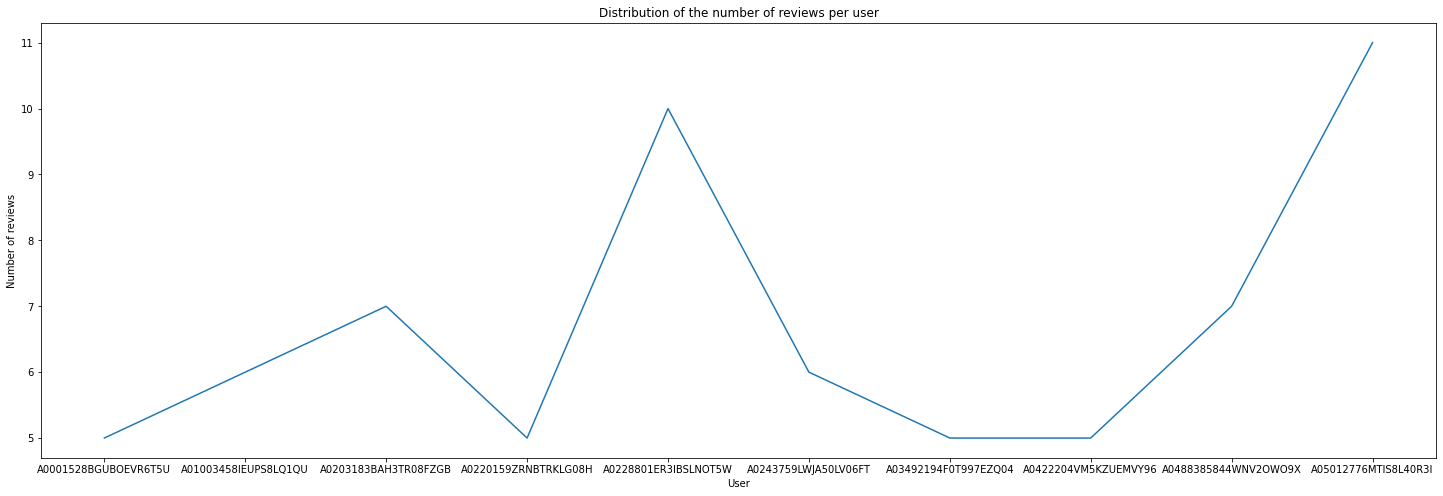

In [24]:
plt.figure(figsize=(25,8))
plt.plot(counts_of_reviews_per_user[:10])
plt.xlabel('User')
plt.ylabel('Number of reviews')
plt.title('Distribution of the number of reviews per user')
plt.show()

In [25]:
positive = df[df['overall'] > 3]
negative = df[df['overall'] < 3]
positive = positive.dropna()
negative = negative.dropna()

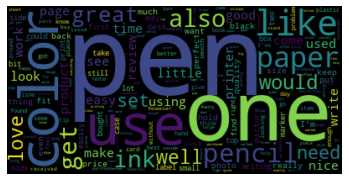

In [26]:
# common words in positive review comments
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
!pip install wordcloud
from wordcloud import WordCloud

stopwords = set(stopwords.words('english'))

pos = " ".join(review for review in positive.reviewText)
wordcloud = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

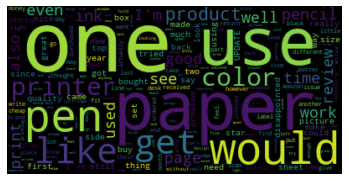

In [27]:
# common words in negative review comments
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
stopwords = set(stopwords.words('english'))
negreviews = " ".join(review for review in negative.reviewText)
wordcloud = WordCloud(stopwords=stopwords).generate(negreviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
df['reviewText']

0         kids like story BUT while i really wanted a bo...
1         Bought this used and it came in great conditio...
2         Every story and book about Corduroy is Fantast...
3         I purchased this book for my first grade class...
4         Having spent numerous years in an elementary s...
                                ...                        
800352                Delivered on time and is as expected.
800353                                        worked great.
800354    I used to score free UPS 4x6 labels.  The blac...
800355                                                great
800356    Struggled finding a sharpener and they didn't ...
Name: reviewText, Length: 800357, dtype: object

### Pre-processing

In [29]:
# Initial trail deleting the rows with null values
'''
Verify the summary column is null if reviewText is null
'''

df.dropna(subset=['reviewText'], inplace=True)

In [30]:
print("Count of null values after the action: ",df["reviewText"].isnull().sum(), "\n")
df.info()

Count of null values after the action:  0 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800144 entries, 0 to 800356
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         800144 non-null  float64
 1   verified        800144 non-null  bool   
 2   reviewTime      800144 non-null  object 
 3   reviewerID      800144 non-null  object 
 4   asin            800144 non-null  object 
 5   style           501295 non-null  object 
 6   reviewerName    800004 non-null  object 
 7   reviewText      800144 non-null  object 
 8   summary         800030 non-null  object 
 9   unixReviewTime  800144 non-null  int64  
 10  vote            88794 non-null   object 
 11  image           11258 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 74.0+ MB


In [31]:
import random
n_samples = random.randint(500, 1000)
df_random = df.sample(n=n_samples)

In [32]:
df_random.shape

(751, 12)

In [33]:
df_random

overall  verified   reviewTime      reviewerID        asin  \
5076        5.0      True  09 19, 2016   A21CVN4R2PU2P  886293095X   
212876      5.0      True  05 23, 2016  A2LLAGJW7PKU9Z  B000WVVJKC   
441263      1.0      True  08 13, 2014  A2CO0L3RD1VMV8  B005K95UI8   
323203      4.0      True  09 24, 2016  A2IAPUSQFEA8Z5  B001DKOAJI   
796509      5.0      True  12 13, 2015   A5C99E8QVQP0P  B018OQA3A8   
...         ...       ...          ...             ...         ...   
225646      4.0      True  01 23, 2014  A1EDSMKPU2J40R  B001167XXY   
155409      5.0      True  06 12, 2015   AZLGFKG5SSSQC  B000EFM5G8   
422611      5.0     False  01 30, 2016  A188CORU15RIRZ  B004XDE024   
2647        5.0      True  10 20, 2015   A54DP8JDYFHZN  1593593236   
484871      1.0      True  12 12, 2012  A1XVXN5GXUBNLZ  B009ELUSI0   

                                 style           reviewerName  \
5076             {'Format:': ' Diary'}               Rach9276   
212876            {'Color:': ' Black'}            aspiringdoc   
441263                             NaN       Sieglinde Kinser   
323203   {'Color:': ' Antiqued Paint'}                Therese   
796509                             NaN       Daphne Gallagher   
...                                ...                    ...   
225646           {'Style:': ' 1 Pack'}  The Interested Reader   
155409            {'Color:': ' Black'}               customer   
422611                             NaN             S. Garsson   
2647    {'Format:': ' Misc. Supplies'}        Italian Dreamer   
484871                             NaN             Jaime Aude   

                                               reviewText  \
5076    I bought this as office supplies for a coworke...   
212876  Beautiful.  Easy to install.  Sturdy and well ...   
441263  Again I will say everything was good with oder...   
323203  This is very attractive, very practical, and o...   
796509  I requested only one line be done in size 11 s...   
...                                                   ...   
225646           Always works and always at a good price.   
155409  Wasn't what we needed, we broke them the first...   
422611  All I can say is that it should come with the ...   
2647                 Lovely bookmark that is as described   
484871  None of the cartridges worked with my HP print...   

                                                  summary  unixReviewTime  \
5076                                        No complaints      1474243200   
212876                         Beautiful. Easy to install      1463961600   
441263  Again I will say everything was good with oder...      1407888000   
323203                           Attractive and Practical      1474675200   
796509                                perfect for my use.      1449964800   
...                                                   ...             ...   
225646                                         Four Stars      1390435200   
155409                                they would be fine.      1434067200   
422611                                         Must have!      1454112000   
2647                                           Five Stars      1445299200   
484871                          MONEY THROWN TO THE TRASH      1355270400   

       vote image  
5076    NaN   NaN  
212876  NaN   NaN  
441263  NaN   NaN  
323203  NaN   NaN  
796509  NaN   NaN  
...     ...   ...  
225646  NaN   NaN  
155409  NaN   NaN  
422611  NaN   NaN  
2647    NaN   NaN  
484871  NaN   NaN  

[751 rows x 12 columns]

In [34]:
def condition(overall):
  # print(df)
  rating = overall
  if rating in (4.0, 5.0):
    return 'Positive'
  elif rating == 3.0:
    return 'Neutral'
  elif rating in (1.0, 2.0):
    return 'Negative'

df_random['label'] = df_random['overall'].apply(condition)

In [35]:
df_random

overall  verified   reviewTime      reviewerID        asin  \
5076        5.0      True  09 19, 2016   A21CVN4R2PU2P  886293095X   
212876      5.0      True  05 23, 2016  A2LLAGJW7PKU9Z  B000WVVJKC   
441263      1.0      True  08 13, 2014  A2CO0L3RD1VMV8  B005K95UI8   
323203      4.0      True  09 24, 2016  A2IAPUSQFEA8Z5  B001DKOAJI   
796509      5.0      True  12 13, 2015   A5C99E8QVQP0P  B018OQA3A8   
...         ...       ...          ...             ...         ...   
225646      4.0      True  01 23, 2014  A1EDSMKPU2J40R  B001167XXY   
155409      5.0      True  06 12, 2015   AZLGFKG5SSSQC  B000EFM5G8   
422611      5.0     False  01 30, 2016  A188CORU15RIRZ  B004XDE024   
2647        5.0      True  10 20, 2015   A54DP8JDYFHZN  1593593236   
484871      1.0      True  12 12, 2012  A1XVXN5GXUBNLZ  B009ELUSI0   

                                 style           reviewerName  \
5076             {'Format:': ' Diary'}               Rach9276   
212876            {'Color:': ' Black'}            aspiringdoc   
441263                             NaN       Sieglinde Kinser   
323203   {'Color:': ' Antiqued Paint'}                Therese   
796509                             NaN       Daphne Gallagher   
...                                ...                    ...   
225646           {'Style:': ' 1 Pack'}  The Interested Reader   
155409            {'Color:': ' Black'}               customer   
422611                             NaN             S. Garsson   
2647    {'Format:': ' Misc. Supplies'}        Italian Dreamer   
484871                             NaN             Jaime Aude   

                                               reviewText  \
5076    I bought this as office supplies for a coworke...   
212876  Beautiful.  Easy to install.  Sturdy and well ...   
441263  Again I will say everything was good with oder...   
323203  This is very attractive, very practical, and o...   
796509  I requested only one line be done in size 11 s...   
...                                                   ...   
225646           Always works and always at a good price.   
155409  Wasn't what we needed, we broke them the first...   
422611  All I can say is that it should come with the ...   
2647                 Lovely bookmark that is as described   
484871  None of the cartridges worked with my HP print...   

                                                  summary  unixReviewTime  \
5076                                        No complaints      1474243200   
212876                         Beautiful. Easy to install      1463961600   
441263  Again I will say everything was good with oder...      1407888000   
323203                           Attractive and Practical      1474675200   
796509                                perfect for my use.      1449964800   
...                                                   ...             ...   
225646                                         Four Stars      1390435200   
155409                                they would be fine.      1434067200   
422611                                         Must have!      1454112000   
2647                                           Five Stars      1445299200   
484871                          MONEY THROWN TO THE TRASH      1355270400   

       vote image     label  
5076    NaN   NaN  Positive  
212876  NaN   NaN  Positive  
441263  NaN   NaN  Negative  
323203  NaN   NaN  Positive  
796509  NaN   NaN  Positive  
...     ...   ...       ...  
225646  NaN   NaN  Positive  
155409  NaN   NaN  Positive  
422611  NaN   NaN  Positive  
2647    NaN   NaN  Positive  
484871  NaN   NaN  Negative  

[751 rows x 13 columns]

In [36]:
# Chose the appropriate columns for your sentiment analyzer.
final_df = pd.DataFrame(df_random[['reviewText', 'label']]) 

In [37]:
type(final_df)

pandas.core.frame.DataFrame

In [38]:
final_df

reviewText     label
5076    I bought this as office supplies for a coworke...  Positive
212876  Beautiful.  Easy to install.  Sturdy and well ...  Positive
441263  Again I will say everything was good with oder...  Negative
323203  This is very attractive, very practical, and o...  Positive
796509  I requested only one line be done in size 11 s...  Positive
...                                                   ...       ...
225646           Always works and always at a good price.  Positive
155409  Wasn't what we needed, we broke them the first...  Positive
422611  All I can say is that it should come with the ...  Positive
2647                 Lovely bookmark that is as described  Positive
484871  None of the cartridges worked with my HP print...  Negative

[751 rows x 2 columns]

    Text cleaning (removing punctuation, special characters, digits.)
    Lowercasing the text
    Tokenization (splitting the text into individual words or tokens)
    Stopword removal (removing common words like "the" or "and")
    Lemmatization (reducing words to their base form)

In [39]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
nltk.download('punkt')

words = []
for _, review in final_df.iterrows():
    # lowercase
    sentence = review['reviewText'].lower()
    # Remove Punctuations
    sentence = sentence.translate(str.maketrans("", "", string.punctuation))
    # Remove Digits
    sentence = re.sub(r'\d+','', sentence)
    # Remove special characters
    sentence = re.sub("[^A-Z]", "", sentence, re.IGNORECASE)

    # Remove stop words
    stopwords = nltk.corpus.stopwords.words("english")
    sentence = " ".join([token for token in sentence.split() if (token not in stopwords)])
    
    # Tokenize the sentence into words
    words.append([word for word in nltk.word_tokenize(sentence)])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aiju2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aiju2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [40]:
words

[['bought', 'office', 'supplies', 'coworker', 'really', 'likes'],
 ['autiful', 'easy', 'install', 'sturdy', 'well', 'made'],
 ['say',
  'everything',
  'good',
  'odering',
  'getting',
  'get',
  'unpack',
  'weeks',
  'found',
  'printer',
  'ahs',
  'issues',
  'printing',
  'color',
  'black',
  'cant',
  'get',
  'money',
  'back',
  'another',
  'one',
  'tec',
  'house',
  'spend',
  'another',
  'find',
  'printer',
  'problem',
  'never',
  'order',
  'mergendise',
  'ever',
  'happy',
  'right',
  'whit',
  'amazon'],
 ['attractive',
  'practical',
  'overall',
  'really',
  'like',
  'looks',
  'fond',
  'press',
  'board',
  'giving',
  'stars',
  'reason',
  'put',
  'table',
  'runner',
  'top',
  'protect',
  'scratches',
  'water',
  'damage',
  'using',
  'combo',
  'guest',
  'room',
  'office',
  'takes',
  'less',
  'floor',
  'space',
  'multiple',
  'items',
  'file',
  'drawer',
  'seems',
  'like',
  'smooth',
  'sturdy',
  'held',
  'well',
  'pulls',
  'withou

In [41]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
#lemmatized_samples = final_df.copy()
lemmatized_samples = words

for i, text in enumerate(lemmatized_samples):
    text = [lemmatizer.lemmatize(word) for word in text]
    # Save to DataFrame
    lemmatized_samples[i] = text
    print(lemmatized_samples[i])

['bought', 'office', 'supply', 'coworker', 'really', 'like']
['autiful', 'easy', 'install', 'sturdy', 'well', 'made']
['say', 'everything', 'good', 'odering', 'getting', 'get', 'unpack', 'week', 'found', 'printer', 'ahs', 'issue', 'printing', 'color', 'black', 'cant', 'get', 'money', 'back', 'another', 'one', 'tec', 'house', 'spend', 'another', 'find', 'printer', 'problem', 'never', 'order', 'mergendise', 'ever', 'happy', 'right', 'whit', 'amazon']
['attractive', 'practical', 'overall', 'really', 'like', 'look', 'fond', 'press', 'board', 'giving', 'star', 'reason', 'put', 'table', 'runner', 'top', 'protect', 'scratch', 'water', 'damage', 'using', 'combo', 'guest', 'room', 'office', 'take', 'le', 'floor', 'space', 'multiple', 'item', 'file', 'drawer', 'seems', 'like', 'smooth', 'sturdy', 'held', 'well', 'pull', 'without', 'much', 'effort', 'check', 'measurement', 'carefully', 'deeper', 'pictured', 'would', 'fine', 'photo', 'look', 'deep']
['requested', 'one', 'line', 'done', 'size', 'sa

In [42]:
# Store back into lemmatized_df
lemmatized_df = final_df.copy()
for i, row in enumerate(lemmatized_df["reviewText"]):
    lemmatized_df["reviewText"].iloc[i] = lemmatized_samples[i]

In [43]:
lemmatized_df

reviewText     label
5076     [bought, office, supply, coworker, really, like]  Positive
212876       [autiful, easy, install, sturdy, well, made]  Positive
441263  [say, everything, good, odering, getting, get,...  Negative
323203  [attractive, practical, overall, really, like,...  Positive
796509  [requested, one, line, done, size, sans, serif...  Positive
...                                                   ...       ...
225646                   [way, work, always, good, price]  Positive
155409  [snt, needed, broke, first, week, office, envi...  Positive
422611  [l, say, come, pen, work, fantastic, would, pu...  Positive
2647                          [vely, bookmark, described]  Positive
484871  [ne, cartridge, worked, hp, printer, deskjet, ...  Negative

[751 rows x 2 columns]

In [47]:
lemmatized_df["reviewText"].isnull().any()

False

In [49]:
X_tfidf = []
for sent in lemmatized_samples:
    # Create the TF-IDF vectorizer object
    tfidf = TfidfVectorizer()

    # Fit and transform the words using the vectorizer object
    try:
        tfidf_matrix = tfidf.fit_transform(sent)
        X_tfidf.append(tfidf_matrix)
    except ValueError as e:
        print("ValueError:",e)
        X_tfidf.append([])

    # Print the TF-IDF matrix
    print(tfidf_matrix.toarray())

[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
[[1.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0

 [0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[1.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 1.]
 [1. 0.]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0

 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ..

 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 

 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]]
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0

### Modeling

#### VADR

In [50]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [51]:
# Valence Aware Dictionary and Sentiment Reasoner (VADR)
VADR_analyzer = SentimentIntensityAnalyzer()
# Pass the analyzer for head 5 rows
for index, row in final_df.head().iterrows():
    vs = VADR_analyzer.polarity_scores(row["reviewText"])
    full_text = row.reviewText
    if vs['neg'] > vs['pos']:
        sentiment = 'Negative'
    elif vs['pos'] > vs['neg']:
        sentiment= 'Positive'
    else:
        sentiment = 'Neutral'
    print(
        f"Index: {index}\n"+
        f"Sentimental Analysis Result: {vs}\n"+
        f"Predicted category: {sentiment}\n"+
        f"Actual category: {row.label}\n"+
        f"Full Text:\n{full_text}\n"+
        "-"*50)

Index: 5076
Sentimental Analysis Result: {'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'compound': 0.4754}
Predicted category: Positive
Actual category: Positive
Full Text:
I bought this as office supplies for a coworker who really likes them.
--------------------------------------------------
Index: 212876
Sentimental Analysis Result: {'neg': 0.0, 'neu': 0.36, 'pos': 0.64, 'compound': 0.836}
Predicted category: Positive
Actual category: Positive
Full Text:
Beautiful.  Easy to install.  Sturdy and well made.
--------------------------------------------------
Index: 441263
Sentimental Analysis Result: {'neg': 0.065, 'neu': 0.884, 'pos': 0.051, 'compound': -0.3215}
Predicted category: Negative
Actual category: Negative
Full Text:
Again I will say everything was good with odering and getting it did not get to unpack it for a few weeks and then found out the printer ahs an Issues with printing color and some with black. Cant get my money back or another one. Had a tec at the house and spend ano

#### TextBlob

In [52]:
!pip install textblob
from textblob import TextBlob

In [53]:
# Print for head 5 rows
for index, row in final_df.head().iterrows():
    text = row["reviewText"]
    full_text = row.reviewText
    sentiment = ""
    
    if isinstance(text, str):
        wiki = TextBlob(text)
        if wiki.sentiment.polarity == 0:
            sentiment = 'Neutral'
        elif wiki.sentiment.polarity < 0 :
            sentiment = ('Negative')
        elif wiki.sentiment.polarity > 0 :
            sentiment = ('Positive')
        
        # Display results
        print(
        f"Index: {index}\n"+
        f"Sentimental Analysis Result: {wiki.sentiment}\n"+
        f"Predicted category: {sentiment}\n"+
        f"Actual category: {row.label}\n"+
        f"Full Text:\n{full_text}\n"+
        "-"*50)

Index: 5076
Sentimental Analysis Result: Sentiment(polarity=0.2, subjectivity=0.2)
Predicted category: Positive
Actual category: Positive
Full Text:
I bought this as office supplies for a coworker who really likes them.
--------------------------------------------------
Index: 212876
Sentimental Analysis Result: Sentiment(polarity=0.6416666666666666, subjectivity=0.9166666666666667)
Predicted category: Positive
Actual category: Positive
Full Text:
Beautiful.  Easy to install.  Sturdy and well made.
--------------------------------------------------
Index: 441263
Sentimental Analysis Result: Sentiment(polarity=0.04447933019361589, subjectivity=0.41975405546834116)
Predicted category: Positive
Actual category: Negative
Full Text:
Again I will say everything was good with odering and getting it did not get to unpack it for a few weeks and then found out the printer ahs an Issues with printing color and some with black. Cant get my money back or another one. Had a tec at the house and spen

#### SENTIWORDNET

In [54]:
from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import word_tokenize
from nltk.wsd import lesk

# Download necessary resources
nltk.download('averaged_perceptron_tagger')
nltk.download('sentiwordnet')

# function to calculate the sentiment score for each word using SentiWordNet
def sw_sentiment_score(word, tag):
    synsets = list(swn.senti_synsets(word, tag))
    if synsets:
        pos_score = synsets[0].pos_score()
        neg_score = synsets[0].neg_score()
        return pos_score - neg_score
    else:
        return 0

# function to calculate the overall sentiment score for each review
def sw_review_sentiment_score(review):
    tokens = word_tokenize(review)
    sentiment_score = 0
    for token in tokens:
        synset = lesk(tokens, token)
        if synset:
            sentiment_score += sw_sentiment_score(synset.lemmas()[0].name(), synset.pos())
    return sentiment_score / len(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aiju2\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\aiju2\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


In [55]:
# Print for head 5 rows
for index, row in final_df.head().iterrows():
    review = row["reviewText"]
    full_text = row.reviewText
    sentiment = ""
    sentiment_score = sw_review_sentiment_score(review)
    
    if sentiment_score > 0:
        sentiment = ('Positive')
    elif sentiment_score < 0:
        sentiment = ('Negative')
    else:
        sentiment = ('Neutral')
    print(
            f"Index: {index}\n"+
            f"Sentimental Analysis Result: {sentiment_score}\n"+
            f"Predicted category: {sentiment}\n"+
            f"Actual category: {row.label}\n"+
            f"Full Text:\n{full_text}\n"+
            "-"*50)

Index: 5076
Sentimental Analysis Result: 0.0
Predicted category: Neutral
Actual category: Positive
Full Text:
I bought this as office supplies for a coworker who really likes them.
--------------------------------------------------
Index: 212876
Sentimental Analysis Result: 0.19318181818181818
Predicted category: Positive
Actual category: Positive
Full Text:
Beautiful.  Easy to install.  Sturdy and well made.
--------------------------------------------------
Index: 441263
Sentimental Analysis Result: -0.018258426966292134
Predicted category: Negative
Actual category: Negative
Full Text:
Again I will say everything was good with odering and getting it did not get to unpack it for a few weeks and then found out the printer ahs an Issues with printing color and some with black. Cant get my money back or another one. Had a tec at the house and spend another 100.00 to find out the printer has a problem. So will never order any such mergendise again for here ever. Not very happy right now w

### Validation

In [56]:
# VADR
predicted_sentiments_vadr = []
for index, row in final_df.iterrows():
    # Pass analyzer
    vs = VADR_analyzer.polarity_scores(row["reviewText"])
    if vs['neg'] > vs['pos']:
      sentiment = 'Negative'
    elif vs['pos'] > vs['neg']:
      sentiment= 'Positive'
    else:
      sentiment = 'Neutral'
    predicted_sentiments_vadr.append(sentiment)

(predicted_sentiments_vadr == df_random['label']).value_counts()

True     610
False    141
Name: label, dtype: int64

In [57]:
count = (predicted_sentiments_vadr == df_random['label']).value_counts()
accuracy = count[True]/(count[True]+count[False]) * 100
accuracy

81.22503328894807

In [58]:
# TextBlob
predicted_sentiments = []
for text in list(final_df['reviewText']):
  if isinstance(text, str):
    wiki = TextBlob(text)
    predicted_sentiments.append(wiki.sentiment)

In [59]:
predicted_ratings_txt = []
for predicted_sentiment in predicted_sentiments:
  if predicted_sentiment.polarity == 0:
    predicted_ratings_txt.append('Neutral')
  elif predicted_sentiment.polarity < 0 :
    predicted_ratings_txt.append('Negative')
  elif predicted_sentiment.polarity > 0 :
    predicted_ratings_txt.append('Positive')

In [60]:
(predicted_ratings_txt == df_random['label']).value_counts()

True     602
False    149
Name: label, dtype: int64

In [61]:
count = (predicted_ratings_txt == df_random['label']).value_counts()
accuracy = count[True]/(count[True]+count[False]) * 100
accuracy

80.15978695073235

In [62]:
# SENTIWORDNET

predicted_sentiments_senti = []
# Classifing each review into positive, negative, or neutral sentiment.
for review in final_df['reviewText']:
    sentiment_score = sw_review_sentiment_score(review)
    if sentiment_score > 0:
# #         print('\nPositive Review:', review)
        predicted_sentiments_senti.append('Positive')
    elif sentiment_score < 0:
#         print('\nNegative Review:', review)
        predicted_sentiments_senti.append('Negative')
    else:
#         print('\nNeutral Review:', review)
        predicted_sentiments_senti.append('Neutral')

In [63]:
count = (predicted_sentiments_senti == df_random['label']).value_counts()
accuracy = count[True]/(count[True]+count[False]) * 100
accuracy

61.65113182423435

### Validation with Preprocessed data

In [64]:
# VADR
predicted_sentiments_vadr = []
for index, row in lemmatized_df.iterrows():
    # Pass analyzer
    vs = VADR_analyzer.polarity_scores(row["reviewText"])
    if vs['neg'] > vs['pos']:
      sentiment = 'Negative'
    elif vs['pos'] > vs['neg']:
      sentiment= 'Positive'
    else:
      sentiment = 'Neutral'
    predicted_sentiments_vadr.append(sentiment)

(predicted_sentiments_vadr == final_df['label']).value_counts()

False    706
True      45
Name: label, dtype: int64

In [65]:
count = (predicted_sentiments_vadr == df_random['label']).value_counts()
accuracy = count[True]/(count[True]+count[False]) * 100
accuracy

5.9920106524633825

In [66]:
# TextBlob
predicted_sentiments = []
for text in list(lemmatized_df['reviewText']):
    wiki = TextBlob(" ".join(text))
    predicted_sentiments.append(wiki.sentiment)

In [67]:
predicted_ratings_txt = []
for predicted_sentiment in predicted_sentiments:
  if predicted_sentiment.polarity == 0:
    predicted_ratings_txt.append('Neutral')
  elif predicted_sentiment.polarity < 0 :
    predicted_ratings_txt.append('Negative')
  elif predicted_sentiment.polarity > 0 :
    predicted_ratings_txt.append('Positive')

In [68]:
(predicted_ratings_txt == final_df['label']).value_counts()

True     493
False    258
Name: label, dtype: int64

In [69]:
count = (predicted_ratings_txt == df_random['label']).value_counts()
accuracy = count[True]/(count[True]+count[False]) * 100
accuracy

65.64580559254327

In [70]:
# SENTIWORDNET

predicted_sentiments_senti = []
# Classifing each review into positive, negative, or neutral sentiment.
for review in final_df['reviewText']:
    text = " ".join(review)
    sentiment_score = sw_review_sentiment_score(text)
    if sentiment_score > 0:
# #         print('\nPositive Review:', review)
        predicted_sentiments_senti.append('Positive')
    elif sentiment_score < 0:
#         print('\nNegative Review:', review)
        predicted_sentiments_senti.append('Negative')
    else:
#         print('\nNeutral Review:', review)
        predicted_sentiments_senti.append('Neutral')

In [71]:
count = (predicted_sentiments_senti == final_df['label']).value_counts()
accuracy = count[True]/(count[True]+count[False]) * 100
print(count)
print(accuracy)

True     606
False    145
Name: label, dtype: int64
80.6924101198402
